In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import drive
import sqlite3 as sql
import plotly.express as px
!pip install pmdarima
from pmdarima.arima.utils import ndiffs, nsdiffs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.8 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
#drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


Our nba players are from 1979 to 2018

In [ ]:
root='drive/MyDrive/PS2_FinalProject'
td=os.path.join(root, 'Player_IDs.csv') #check
ua_data=pd.read_csv(td)
alst=os.path.join(root, 'All_stars_2023.csv')
college_stats=os.path.join(root, 'College_Stats.csv') #college_cleaned
college_clean=os.path.join(root, 'college_cleaned.csv')
as_data=pd.read_csv(alst, encoding = 'latin-1') #UTF-8 error
college_df=pd.read_csv(college_clean)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
college_df.head()

,Unnamed: 0,YEAR,Player,College,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,PER,TS%,eFG%,3PAr,FTr,PProd,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM,VORP
0,0,2018.0,Deandre Ayton,Arizona,2017-18,Arizona,Pac-12,35.0,35.0,33.5,7.9,12.9,0.612,7.5,11.9,0.635,0.3,1.0,0.343,4.0,5.5,0.733,3.4,8.2,11.6,1.6,0.6,1.9,2.0,2.3,20.1,6.84,32.6,0.650,0.625,0.078,0.424,666.0,13.5,28.2,21.4,10.2,1.0,6.1,11.3,26.6,5.5,2.1,7.6,0.259,8.6,2.4,11.0,7.2
1,1,2018.0,Deandre Ayton,NaN,Career,Arizona,Pac-12,35.0,35.0,33.5,7.9,12.9,0.612,7.5,11.9,0.635,0.3,1.0,0.343,4.0,5.5,0.733,3.4,8.2,11.6,1.6,0.6,1.9,2.0,2.3,20.1,6.84,32.6,0.650,0.625,0.078,0.424,666.0,13.5,28.2,21.4,10.2,1.0,6.1,11.3,26.6,5.5,2.1,7.6,0.259,8.6,2.4,11.0,7.2
2,2,2018.0,Marvin Bagley III,Duke,2017-18,Duke,ACC,33.0,32.0,33.9,8.2,13.3,0.614,7.5,11.6,0.647,0.7,1.8,0.397,4.0,6.3,0.627,4.0,7.1,11.1,1.5,0.8,0.9,2.3,1.8,21.0,9.70,30.6,0.643,0.640,0.132,0.475,630.0,13.8,21.5,17.9,8.8,1.4,2.6,12.2,26.3,4.8,2.1,6.9,0.248,8.8,2.0,10.8,0.0
3,3,2018.0,Marvin Bagley III,NaN,Career,Duke,ACC,33.0,32.0,33.9,8.2,13.3,0.614,7.5,11.6,0.647,0.7,1.8,0.397,4.0,6.3,0.627,4.0,7.1,11.1,1.5,0.8,0.9,2.3,1.8,21.0,9.70,30.6,0.643,0.640,0.132,0.475,630.0,13.8,21.5,17.9,8.8,1.4,2.6,12.2,26.3,4.8,2.1,6.9,0.248,8.8,2.0,10.8,0.0
4,4,2018.0,Jaren Jackson Jr.,Michigan State,2017-18,Michigan State,Big Ten,35.0,34.0,21.8,3.4,6.6,0.513,2.3,3.9,0.596,1.1,2.7,0.396,3.0,3.8,0.797,1.5,4.3,5.8,1.1,0.6,3.0,1.8,3.2,10.9,7.10,26.9,0.647,0.595,0.414,0.573,347.0,8.8,19.7,15.0,9.3,1.6,14.3,17.4,23.5,2.3,2.2,4.6,0.239,4.4,7.3,11.7,4.4


In [ ]:
ua_data.head()

,NBA ID,YEAR,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP
0,1629028.0,2018.0,1.0,1.0,PHO,Deandre Ayton,Arizona,5,296,9069,4944,3097,491,0.597,0.263,0.752,30.6,16.7,10.5,1.7,30.4,0.161,1.2,7.2
1,1628963.0,2018.0,2.0,2.0,SAC,Marvin Bagley III,Duke,5,199,4905,2628,1445,175,0.505,0.283,0.67,24.6,13.2,7.3,0.9,8.8,0.086,-2,0
2,NaN,2018.0,3.0,3.0,ATL,Luka Dončić,NaN,5,321,10996,8841,2747,2560,0.466,0.339,0.737,34.3,27.5,8.6,8,38.3,0.167,7.3,25.8
3,1628991.0,2018.0,4.0,4.0,MEM,Jaren Jackson Jr.,Michigan State,5,254,6909,4060,1380,282,0.459,0.349,0.792,27.2,16,5.4,1.1,17.7,0.123,0.5,4.4
4,1629027.0,2018.0,5.0,5.0,DAL,Trae Young,Oklahoma,5,342,11570,8753,1273,3168,0.439,0.352,0.876,33.8,25.6,3.7,9.3,32.3,0.134,3.2,15.1


In [ ]:
college_df.columns

Index(['YEAR', 'Player', 'College', 'Season', 'School', 'Conf', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS', 'PER', 'TS%', 'eFG%', '3PAr', 'FTr', 'PProd', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/40', 'OBPM', 'DBPM', 'BPM', 'VORP'], dtype='object')

In [ ]:
ua_data.columns

Index(['NBA ID', 'YEAR', 'Rk', 'Pk', 'Tm', 'Player', 'College', 'Yrs', 'G', 'MP', 'PTS', 'TRB', 'AST', 'FG%', '3P%', 'FT%', 'MP.1', 'PTS.1', 'TRB.1', 'AST.1', 'WS', 'WS/48', 'BPM', 'VORP'], dtype='object')

In [ ]:
uad_cols=[i for i in list(ua_data.columns) if i not in list(college_df.columns)]
uad_cols.append('Player')
uad_cols

['NBA ID',
 'Rk',
 'Pk',
 'Tm',
 'Yrs',
 'MP.1',
 'PTS.1',
 'TRB.1',
 'AST.1',
 'WS/48',
 'Player']

No need to run bottom here, already cleaned the data

In [ ]:
college_df.dropna(thresh=college_df.shape[1], axis=1, inplace=True) #drop rows with full NAN
college_df = college_df[college_df.isnull().sum(axis=1)<college_df.shape[1]-2] #threshold df to select, less than a certain number of nulls
#college_df.dropna(thresh=college_df.shape[1]-2, axis=1, inplace=True) #drop noncollege players;  year and player only columns
#print(college_df[college_df.YEAR > 1999]['Player'].values)

In [ ]:
college_df.YEAR.ffill(inplace=True)
college_df.Player.ffill(inplace=True)

In [ ]:
college20002018=college_df[college_df.YEAR > 1999]
college20002018.drop('Unnamed: 61', axis=1, inplace=True)
college20002018

<ipython-input-63-ada10c83fd84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college20002018.drop('Unnamed: 61', axis=1, inplace=True)


,YEAR,Player,College,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,Season.1,School.1,Conf.1,G.1,GS.1,MP.1,PER,TS%,eFG%,3PAr,FTr,PProd,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM
0,2018.0,Deandre Ayton,Arizona,2017-18,Arizona,Pac-12,35,35,33.5,7.9,12.9,0.612,7.5,11.9,0.635,0.3,1,0.343,4,5.5,0.733,3.4,8.2,11.6,1.6,0.6,1.9,2,2.3,20.1,6.84,2017-18,Arizona,Pac-12,35,35,1172,32.6,0.65,0.625,0.078,0.424,666,13.5,28.2,21.4,10.2,1,6.1,11.3,26.6,5.5,2.1,7.6,0.259,8.6,2.4,11.0
1,2018.0,Deandre Ayton,NaN,Career,Arizona,NaN,35,35,33.5,7.9,12.9,0.612,7.5,11.9,0.635,0.3,1,0.343,4,5.5,0.733,3.4,8.2,11.6,1.6,0.6,1.9,2,2.3,20.1,6.84,Career,Arizona,NaN,35,35,1172,32.6,0.65,0.625,0.078,0.424,666,13.5,28.2,21.4,10.2,1,6.1,11.3,26.6,5.5,2.1,7.6,0.259,8.6,2.4,11.0
2,2018.0,Marvin Bagley III,Duke,2017-18,Duke,ACC,33,32,33.9,8.2,13.3,0.614,7.5,11.6,0.647,0.7,1.8,0.397,4,6.3,0.627,4,7.1,11.1,1.5,0.8,0.9,2.3,1.8,21,9.7,2017-18,Duke,ACC,33,32,1118,30.6,0.643,0.64,0.132,0.475,630,13.8,21.5,17.9,8.8,1.4,2.6,12.2,26.3,4.8,2.1,6.9,0.248,8.8,2.0,10.8
3,2018.0,Marvin Bagley III,NaN,Career,Duke,NaN,33,32,33.9,8.2,13.3,0.614,7.5,11.6,0.647,0.7,1.8,0.397,4,6.3,0.627,4,7.1,11.1,1.5,0.8,0.9,2.3,1.8,21,9.7,Career,Duke,NaN,33,32,1118,30.6,0.643,0.64,0.132,0.475,630,13.8,21.5,17.9,8.8,1.4,2.6,12.2,26.3,4.8,2.1,6.9,0.248,8.8,2.0,10.8
5,2018.0,Jaren Jackson Jr.,Michigan State,2017-18,Michigan State,Big Ten,35,34,21.8,3.4,6.6,0.513,2.3,3.9,0.596,1.1,2.7,0.396,3,3.8,0.797,1.5,4.3,5.8,1.1,0.6,3,1.8,3.2,10.9,7.1,2017-18,Michigan State,Big Ten,35,34,764,26.9,0.647,0.595,0.414,0.573,347,8.8,19.7,15,9.3,1.6,14.3,17.4,23.5,2.3,2.2,4.6,0.239,4.4,7.3,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,2000.0,Mark Madsen,Stanford,1996-97,Stanford,Pac-10,25,0,16.4,2,3.8,0.537,2,3.8,0.537,0,0,NaN,1.8,3,0.608,NaN,NaN,5,0.3,0.2,0.4,0.9,3.1,5.9,9.21,1996-97,Stanford,Pac-10,25,0,410,NaN,0.565,0.537,0,0.779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN,0.7,1,1.8,0.172,NaN,NaN,NaN
1718,2000.0,Mark Madsen,NaN,1997-98,Stanford,Pac-10,27,24,26.1,4.3,7.3,0.589,4.3,7.3,0.592,0,0,0,3.1,4.9,0.629,3.4,4.7,8.1,0.7,0.4,0.4,1.3,2.6,11.7,8.12,1997-98,Stanford,Pac-10,27,24,706,NaN,0.606,0.589,0.005,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.6,3.7,0.207,NaN,NaN,NaN
1719,2000.0,Mark Madsen,NaN,1998-99,Stanford,Pac-10,33,33,29.4,4.6,7.7,0.605,4.6,7.6,0.607,0,0,0,3.8,6.6,0.583,NaN,NaN,9,0.5,0.5,0.6,1.5,2.3,13.1,10.36,1998-99,Stanford,Pac-10,33,33,969,NaN,0.607,0.605,0.004,0.862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.5,NaN,3.1,3.4,6.5,0.267,NaN,NaN,NaN
1720,2000.0,Mark Madsen,NaN,1999-00,Stanford,Pac-10,23,20,27.3,4.7,8,0.587,4.7,8,0.587,0,0,NaN,2.8,4.9,0.575,NaN,NaN,9.3,1.1,0.6,0.9,1.5,2.3,12.2,7.12,1999-00,Stanford,Pac-10,23,20,628,NaN,0.591,0.587,0,0.614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.5,NaN,1.8,2.4,4.2,0.269,NaN,NaN,NaN


In [ ]:
#players who transferred with gap years
list(college20002018[college20002018['G']=='Transfer']['Player'].unique())

['Rodney Hood',
 'Arnett Moultrie',
 'Wesley Johnson',
 'Ekpe Udoh',
 'Jordan Crawford',
 'DeMarre Carroll',
 'Toney Douglas',
 'J.R. Giddens',
 'Joey Graham',
 'Jarvis Hayes',
 'Dahntay Jones',
 'Ryan Humphrey',
 'Chris Jefferies',
 'Dan Dickau',
 'Michael Bradley',
 'Courtney Alexander']

In [ ]:
college20002018.columns

Index(['YEAR', 'Player', 'College', 'Season', 'School', 'Conf', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS', 'Season.1', 'School.1', 'Conf.1', 'G.1', 'GS.1', 'MP.1', 'PER', 'TS%', 'eFG%', '3PAr', 'FTr', 'PProd', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/40', 'OBPM', 'DBPM', 'BPM'], dtype='object')

In [ ]:
#remove some duplicate columns
college20002018=college20002018[['YEAR', 'Player', 'College', 'Season', 'School', 'Conf', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS', 'PER', 'TS%', 'eFG%', '3PAr', 'FTr', 'PProd', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/40', 'OBPM', 'DBPM', 'BPM']]

In [ ]:
college20002018=college20002018[~(college20002018['G']=='Transfer')]
college20002018

,YEAR,Player,College,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,PER,TS%,eFG%,3PAr,FTr,PProd,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM
0,2018.0,Deandre Ayton,Arizona,2017-18,Arizona,Pac-12,35,35,33.5,7.9,12.9,0.612,7.5,11.9,0.635,0.3,1,0.343,4,5.5,0.733,3.4,8.2,11.6,1.6,0.6,1.9,2,2.3,20.1,6.84,32.6,0.65,0.625,0.078,0.424,666,13.5,28.2,21.4,10.2,1,6.1,11.3,26.6,5.5,2.1,7.6,0.259,8.6,2.4,11.0
1,2018.0,Deandre Ayton,NaN,Career,Arizona,NaN,35,35,33.5,7.9,12.9,0.612,7.5,11.9,0.635,0.3,1,0.343,4,5.5,0.733,3.4,8.2,11.6,1.6,0.6,1.9,2,2.3,20.1,6.84,32.6,0.65,0.625,0.078,0.424,666,13.5,28.2,21.4,10.2,1,6.1,11.3,26.6,5.5,2.1,7.6,0.259,8.6,2.4,11.0
2,2018.0,Marvin Bagley III,Duke,2017-18,Duke,ACC,33,32,33.9,8.2,13.3,0.614,7.5,11.6,0.647,0.7,1.8,0.397,4,6.3,0.627,4,7.1,11.1,1.5,0.8,0.9,2.3,1.8,21,9.7,30.6,0.643,0.64,0.132,0.475,630,13.8,21.5,17.9,8.8,1.4,2.6,12.2,26.3,4.8,2.1,6.9,0.248,8.8,2.0,10.8
3,2018.0,Marvin Bagley III,NaN,Career,Duke,NaN,33,32,33.9,8.2,13.3,0.614,7.5,11.6,0.647,0.7,1.8,0.397,4,6.3,0.627,4,7.1,11.1,1.5,0.8,0.9,2.3,1.8,21,9.7,30.6,0.643,0.64,0.132,0.475,630,13.8,21.5,17.9,8.8,1.4,2.6,12.2,26.3,4.8,2.1,6.9,0.248,8.8,2.0,10.8
5,2018.0,Jaren Jackson Jr.,Michigan State,2017-18,Michigan State,Big Ten,35,34,21.8,3.4,6.6,0.513,2.3,3.9,0.596,1.1,2.7,0.396,3,3.8,0.797,1.5,4.3,5.8,1.1,0.6,3,1.8,3.2,10.9,7.1,26.9,0.647,0.595,0.414,0.573,347,8.8,19.7,15,9.3,1.6,14.3,17.4,23.5,2.3,2.2,4.6,0.239,4.4,7.3,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,2000.0,Mark Madsen,Stanford,1996-97,Stanford,Pac-10,25,0,16.4,2,3.8,0.537,2,3.8,0.537,0,0,NaN,1.8,3,0.608,NaN,NaN,5,0.3,0.2,0.4,0.9,3.1,5.9,9.21,NaN,0.565,0.537,0,0.779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN,0.7,1,1.8,0.172,NaN,NaN,NaN
1718,2000.0,Mark Madsen,NaN,1997-98,Stanford,Pac-10,27,24,26.1,4.3,7.3,0.589,4.3,7.3,0.592,0,0,0,3.1,4.9,0.629,3.4,4.7,8.1,0.7,0.4,0.4,1.3,2.6,11.7,8.12,NaN,0.606,0.589,0.005,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.6,3.7,0.207,NaN,NaN,NaN
1719,2000.0,Mark Madsen,NaN,1998-99,Stanford,Pac-10,33,33,29.4,4.6,7.7,0.605,4.6,7.6,0.607,0,0,0,3.8,6.6,0.583,NaN,NaN,9,0.5,0.5,0.6,1.5,2.3,13.1,10.36,NaN,0.607,0.605,0.004,0.862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.5,NaN,3.1,3.4,6.5,0.267,NaN,NaN,NaN
1720,2000.0,Mark Madsen,NaN,1999-00,Stanford,Pac-10,23,20,27.3,4.7,8,0.587,4.7,8,0.587,0,0,NaN,2.8,4.9,0.575,NaN,NaN,9.3,1.1,0.6,0.9,1.5,2.3,12.2,7.12,NaN,0.591,0.587,0,0.614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.5,NaN,1.8,2.4,4.2,0.269,NaN,NaN,NaN


In [ ]:
#college20002018.to_csv('drive/MyDrive/PS2_FinalProject/college_cleaned.csv')

**Start here**

In [ ]:
#TODO: imputing missing stats (forward fill?)
#TODO: join dataset with VORP
college_df.drop("Unnamed: 0", axis=1, inplace=True)
college_vorp=pd.merge(college_df, ua_data[uad_cols], how="inner", on="Player") #remerge fix
college_vorp['Conf'].ffill(inplace=True)
#TODO: split dataframe based on Conference and then reconcat after the values have been interpolated

In [ ]:
college_vorp.head()
#college_vorp.to_csv('drive/MyDrive/PS2_FinalProject/college_cleaned.csv')
len(college_vorp.Conf.unique())

28

In [ ]:
college_vorp.columns

Index(['YEAR', 'Player', 'College', 'Season', 'School', 'Conf', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS', 'PER', 'TS%', 'eFG%', '3PAr', 'FTr', 'PProd', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/40', 'OBPM', 'DBPM', 'BPM', 'VORP', 'NBA ID', 'Rk', 'Pk', 'Tm', 'Yrs', 'MP.1', 'PTS.1', 'TRB.1', 'AST.1', 'WS/48'], dtype='object')

In [ ]:
college_vorp.head()

,YEAR,Player,College,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,PER,TS%,eFG%,3PAr,FTr,PProd,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM,VORP,NBA ID,Rk,Pk,Tm,Yrs,MP.1,PTS.1,TRB.1,AST.1,WS/48
0,2018.0,Deandre Ayton,Arizona,2017-18,Arizona,Pac-12,35.0,35.0,33.5,7.9,12.9,0.612,7.5,11.9,0.635,0.3,1.0,0.343,4.0,5.5,0.733,3.4,8.2,11.6,1.6,0.6,1.9,2.0,2.3,20.1,6.84,32.6,0.650,0.625,0.078,0.424,666.0,13.5,28.2,21.4,10.2,1.0,6.1,11.3,26.6,5.5,2.1,7.6,0.259,8.6,2.4,11.0,7.2,1629028.0,1.0,1.0,PHO,5,30.6,16.7,10.5,1.7,0.161
1,2018.0,Deandre Ayton,NaN,Career,Arizona,Pac-12,35.0,35.0,33.5,7.9,12.9,0.612,7.5,11.9,0.635,0.3,1.0,0.343,4.0,5.5,0.733,3.4,8.2,11.6,1.6,0.6,1.9,2.0,2.3,20.1,6.84,32.6,0.650,0.625,0.078,0.424,666.0,13.5,28.2,21.4,10.2,1.0,6.1,11.3,26.6,5.5,2.1,7.6,0.259,8.6,2.4,11.0,7.2,1629028.0,1.0,1.0,PHO,5,30.6,16.7,10.5,1.7,0.161
2,2018.0,Marvin Bagley III,Duke,2017-18,Duke,ACC,33.0,32.0,33.9,8.2,13.3,0.614,7.5,11.6,0.647,0.7,1.8,0.397,4.0,6.3,0.627,4.0,7.1,11.1,1.5,0.8,0.9,2.3,1.8,21.0,9.70,30.6,0.643,0.640,0.132,0.475,630.0,13.8,21.5,17.9,8.8,1.4,2.6,12.2,26.3,4.8,2.1,6.9,0.248,8.8,2.0,10.8,0.0,1628963.0,2.0,2.0,SAC,5,24.6,13.2,7.3,0.9,0.086
3,2018.0,Marvin Bagley III,NaN,Career,Duke,ACC,33.0,32.0,33.9,8.2,13.3,0.614,7.5,11.6,0.647,0.7,1.8,0.397,4.0,6.3,0.627,4.0,7.1,11.1,1.5,0.8,0.9,2.3,1.8,21.0,9.70,30.6,0.643,0.640,0.132,0.475,630.0,13.8,21.5,17.9,8.8,1.4,2.6,12.2,26.3,4.8,2.1,6.9,0.248,8.8,2.0,10.8,0.0,1628963.0,2.0,2.0,SAC,5,24.6,13.2,7.3,0.9,0.086
4,2018.0,Jaren Jackson Jr.,Michigan State,2017-18,Michigan State,Big Ten,35.0,34.0,21.8,3.4,6.6,0.513,2.3,3.9,0.596,1.1,2.7,0.396,3.0,3.8,0.797,1.5,4.3,5.8,1.1,0.6,3.0,1.8,3.2,10.9,7.10,26.9,0.647,0.595,0.414,0.573,347.0,8.8,19.7,15.0,9.3,1.6,14.3,17.4,23.5,2.3,2.2,4.6,0.239,4.4,7.3,11.7,4.4,1628991.0,4.0,4.0,MEM,5,27.2,16,5.4,1.1,0.123


In [ ]:
#check for players with null vorps
list(college_vorp[college_vorp.VORP.isna()]["Player"].values)

['Nikola Milutinov', 'Livio Jean-Charles', 'Petteri Koponen', 'Fran Vázquez']

In [ ]:
college_vorp[~college_vorp.Player.isin(list(college_vorp[college_vorp.VORP.isna()]["Player"].values))]['VORP'].isna().sum()

0

In [ ]:
college_vorp=college_vorp[~college_vorp.Player.isin(list(college_vorp[college_vorp.VORP.isna()]["Player"].values))]

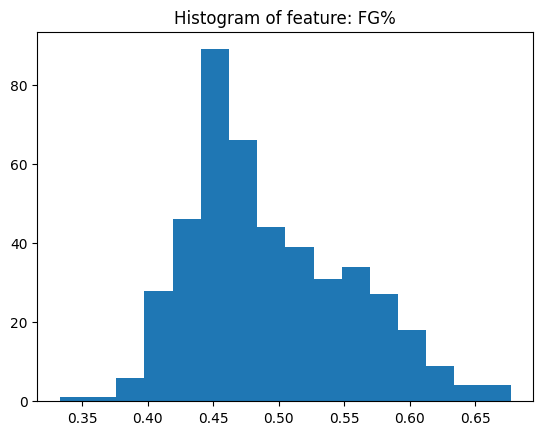

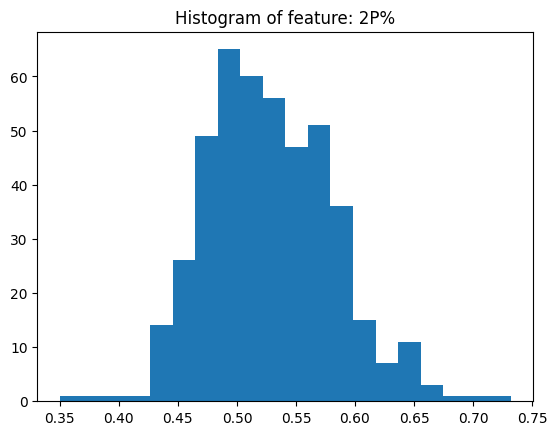

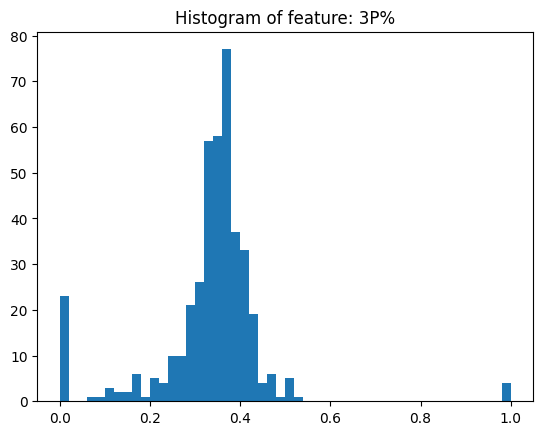

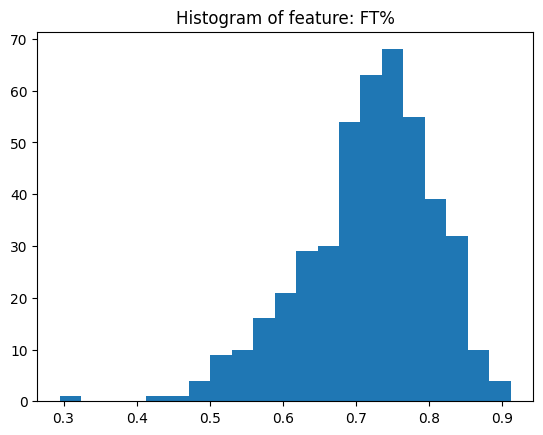

In [ ]:
cc_vorp=college_vorp[college_vorp.Season=='Career']
for ft in ['FG%','2P%','3P%','FT%']:
  plt.hist(cc_vorp[ft], bins='auto')
  plt.title(f'Histogram of feature: {ft}')
  plt.show()

In [ ]:
#college career vorp nans
cc_vorp.isna().sum()

YEAR         0
Player       0
College    447
Season       0
School       0
Conf         0
G            0
GS           0
MP           0
FG           0
FGA          0
FG%          0
2P           0
2PA          0
2P%          0
3P           0
3PA          0
3P%         30
FT           0
FTA          0
FT%          0
ORB         62
DRB         62
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
SOS          0
PER        245
TS%          0
eFG%         0
3PAr         0
FTr          0
PProd      216
ORB%       216
DRB%       216
TRB%        69
AST%        69
STL%       210
BLK%        69
TOV%         0
USG%        70
OWS          0
DWS          0
WS           0
WS/40        0
OBPM       245
DBPM       246
BPM        245
VORP         0
NBA ID       0
Rk           0
Pk           0
Tm           0
Yrs          0
MP.1         0
PTS.1        0
TRB.1        0
AST.1        0
WS/48        0
dtype: int64

Interpolate stats that are completely missing based on season, conference https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html


In [ ]:
#Erick Barkley
dlil=college_vorp[(college_vorp.Player=='Erick Barkley') & (college_vorp.Season!='Career')]
dlil[(dlil.isna()).columns]
mask=dlil[['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS', 'PER', 'TS%', 'eFG%', '3PAr', 'FTr', 'PProd', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/40', 'OBPM', 'DBPM', 'BPM']].isna().sum()
for m in list(mask[mask>0].index):
  dlil.loc[:,m]=dlil.loc[:,m].fillna(dlil.loc[:, m].mean())
dlil

<ipython-input-38-6ebcb99e3c51>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dlil.loc[:,m]=dlil.loc[:,m].fillna(dlil.loc[:, m].mean())


,YEAR,Player,College,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,PER,TS%,eFG%,3PAr,FTr,PProd,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM,VORP,NBA ID,Rk,Pk,Tm,Yrs,MP.1,PTS.1,TRB.1,AST.1,WS/48
1672,2000.0,Erick Barkley,St. John's,1998-99,St. John's (NY),Big East,37.0,37.0,33.2,4.2,10.7,0.395,2.7,6.2,0.433,1.5,4.5,0.343,3.5,4.5,0.772,NaN,NaN,3.2,4.7,2.2,0.3,2.1,2.5,13.5,9.07,NaN,0.525,0.467,0.418,0.421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9,NaN,1.9,3.0,4.9,0.160,NaN,NaN,NaN,-0.1,2057.0,28.0,28.0,POR,2,9.9,2.9,0.8,1.5,0.027
1673,2000.0,Erick Barkley,NaN,1999-00,St. John's (NY),Big East,28.0,27.0,36.9,5.7,14.3,0.398,3.9,8.6,0.454,1.8,5.7,0.313,2.9,4.4,0.664,NaN,NaN,3.0,4.5,3.0,0.3,2.4,2.3,16.0,6.96,NaN,0.490,0.460,0.400,0.305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.9,NaN,1.0,0.8,1.7,0.067,NaN,NaN,NaN,-0.1,2057.0,28.0,28.0,POR,2,9.9,2.9,0.8,1.5,0.027


Method to impute bball stats: backfill or insert mean, median of stat?

In [ ]:
#backfill null values; impute with median Debug
import warnings
warnings.filterwarnings("ignore")
imputed_per_player=[]
for player in list(college_vorp.Player.unique()):
  #for each column that has null values, backfill
  dlil=college_vorp[(college_vorp.Player==player) & (college_vorp.Season!='Career')]
  #college_career=college_vorp[(college_vorp.Player==player) & (college_vorp.Season=='Career')]
  dlil[(dlil.isna()).columns]
  mask=dlil[['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS', 'PER', 'TS%', 'eFG%', '3PAr', 'FTr', 'PProd', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/40', 'OBPM', 'DBPM', 'BPM']].isna().sum()
  for m in list(mask[mask>0].index):
    dlil.loc[:,m]=dlil.loc[:,m].fillna(dlil.loc[:, m].mean())
  imputed_per_player.append(dlil)

In [ ]:
all_imputed=pd.concat(imputed_per_player, axis=0)
all_imputed
#subtract avg of conference stats to get rid of confounders

,YEAR,Player,College,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,PER,TS%,eFG%,3PAr,FTr,PProd,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM,VORP,NBA ID,Rk,Pk,Tm,Yrs,MP.1,PTS.1,TRB.1,AST.1,WS/48
0,2018.0,Deandre Ayton,Arizona,2017-18,Arizona,Pac-12,35.0,35.0,33.5,7.9,12.9,0.612,7.5,11.9,0.635,0.3,1.0,0.343,4.0,5.5,0.733,3.4,8.2,11.6,1.6,0.6,1.9,2.0,2.3,20.1,6.84,32.6,0.650,0.625,0.078,0.424,666.0,13.5,28.2,21.4,10.2,1.0,6.1,11.300000,26.6,5.5,2.1,7.6,0.259,8.6,2.4,11.0,7.2,1629028.0,1.0,1.0,PHO,5,30.6,16.7,10.5,1.7,0.161
2,2018.0,Marvin Bagley III,Duke,2017-18,Duke,ACC,33.0,32.0,33.9,8.2,13.3,0.614,7.5,11.6,0.647,0.7,1.8,0.397,4.0,6.3,0.627,4.0,7.1,11.1,1.5,0.8,0.9,2.3,1.8,21.0,9.70,30.6,0.643,0.640,0.132,0.475,630.0,13.8,21.5,17.9,8.8,1.4,2.6,12.200000,26.3,4.8,2.1,6.9,0.248,8.8,2.0,10.8,0.0,1628963.0,2.0,2.0,SAC,5,24.6,13.2,7.3,0.9,0.086
4,2018.0,Jaren Jackson Jr.,Michigan State,2017-18,Michigan State,Big Ten,35.0,34.0,21.8,3.4,6.6,0.513,2.3,3.9,0.596,1.1,2.7,0.396,3.0,3.8,0.797,1.5,4.3,5.8,1.1,0.6,3.0,1.8,3.2,10.9,7.10,26.9,0.647,0.595,0.414,0.573,347.0,8.8,19.7,15.0,9.3,1.6,14.3,17.400000,23.5,2.3,2.2,4.6,0.239,4.4,7.3,11.7,4.4,1628991.0,4.0,4.0,MEM,5,27.2,16,5.4,1.1,0.123
6,2018.0,Trae Young,Oklahoma,2017-18,Oklahoma,Big 12,32.0,32.0,35.4,8.2,19.3,0.422,4.5,9.1,0.493,3.7,10.3,0.360,7.4,8.6,0.861,0.4,3.5,3.9,8.7,1.7,0.3,5.2,1.8,27.4,10.56,28.3,0.585,0.518,0.531,0.443,935.0,1.3,10.0,5.8,48.6,2.5,0.7,18.200000,37.1,4.6,1.1,5.7,0.201,9.7,1.3,11.1,15.1,1629027.0,5.0,5.0,DAL,5,33.8,25.6,3.7,9.3,0.134
8,2018.0,Mo Bamba,Texas,2017-18,Texas,Big 12,30.0,29.0,30.2,4.9,9.0,0.541,4.4,7.3,0.603,0.5,1.7,0.275,2.7,4.0,0.681,3.2,7.3,10.5,0.5,0.8,3.7,1.5,2.5,12.9,10.67,28.3,0.593,0.567,0.189,0.441,377.0,12.2,28.2,20.2,3.6,1.5,13.1,12.300000,21.3,2.4,2.4,4.8,0.212,5.0,5.9,10.9,2.8,1628964.0,6.0,6.0,ORL,5,18.2,7.6,5.8,0.9,0.122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,2000.0,Erick Barkley,NaN,1999-00,St. John's (NY),Big East,28.0,27.0,36.9,5.7,14.3,0.398,3.9,8.6,0.454,1.8,5.7,0.313,2.9,4.4,0.664,NaN,NaN,3.0,4.5,3.0,0.3,2.4,2.3,16.0,6.96,NaN,0.490,0.460,0.400,0.305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.900000,NaN,1.0,0.8,1.7,0.067,NaN,NaN,NaN,-0.1,2057.0,28.0,28.0,POR,2,9.9,2.9,0.8,1.5,0.027
1675,2000.0,Mark Madsen,Stanford,1996-97,Stanford,Pac-10,25.0,0.0,16.4,2.0,3.8,0.537,2.0,3.8,0.537,0.0,0.0,0.000,1.8,3.0,0.608,3.4,4.7,5.0,0.3,0.2,0.4,0.9,3.1,5.9,9.21,NaN,0.565,0.537,0.000,0.779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.500000,NaN,0.7,1.0,1.8,0.172,NaN,NaN,NaN,-2.9,2058.0,29.0,29.0,LAL,9,11.8,2.2,2.6,0.4,0.074
1676,2000.0,Mark Madsen,NaN,1997-98,Stanford,Pac-10,27.0,24.0,26.1,4.3,7.3,0.589,4.3,7.3,0.592,0.0,0.0,0.000,3.1,4.9,0.629,3.4,4.7,8.1,0.7,0.4,0.4,1.3,2.6,11.7,8.12,NaN,0.606,0.589,0.005,0.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.166667,NaN,2.0,1.6,3.7,0.207,NaN,NaN,NaN,-2.9,2058.0,29.0,29.0,LAL,9,11.8,2.2,2.6,0.4,0.074
1677,2000.0,Mark Madsen,NaN,1998-99,Stanford,Pac-10,33.0,33.0,29.4,4.6,7.7,0.605,4.6,7.6,0.607,0.0,0.0,0.000,3.8,6.6,0.583,3.4,4.7,9.0,0.5,0.5,0.6,1.5,2.3,13.1,10.36,NaN,0.607,0.605,0.004,0.862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.500000,NaN,3.1,3.4,6.5,0.267,NaN,NaN,NaN,-2.9,2058.0,29.0,29.0,LAL,9,11.8,2.2,2.6,0.4,0.074


In [ ]:
#TODO: Interpolate Nans
interpolated_df=all_imputed.interpolate(method='pad',  limit_direction='forward')

In [ ]:
all(interpolated_df.isna().sum() == 0)

True

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
mm_scaled = scaler.fit_transform(interpolated_df[['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS', 'PER', 'TS%', 'eFG%', '3PAr', 'FTr', 'PProd', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/40', 'OBPM', 'DBPM', 'BPM']])
mm_scaled

array([[0.34693878, 0.36842105, 0.84254144, ..., 0.64864865, 0.31355932,
        0.77777778],
       [0.32653061, 0.33684211, 0.85359116, ..., 0.65405405, 0.27966102,
        0.77060932],
       [0.34693878, 0.35789474, 0.51933702, ..., 0.53513514, 0.72881356,
        0.80286738],
       ...,
       [0.26530612, 0.25263158, 0.63812155, ..., 0.61081081, 0.29661017,
        0.72043011],
       [0.32653061, 0.34736842, 0.72928177, ..., 0.61081081, 0.29661017,
        0.72043011],
       [0.2244898 , 0.21052632, 0.67127072, ..., 0.61081081, 0.29661017,
        0.72043011]])

In [ ]:
minmax_scaled=pd.DataFrame(mm_scaled, columns=['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS', 'PER', 'TS%', 'eFG%', '3PAr', 'FTr', 'PProd', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/40', 'OBPM', 'DBPM', 'BPM'])
minmax_scaled.describe()['G']

count    1233.000000
mean        0.329965
std         0.075377
min         0.000000
25%         0.306122
50%         0.326531
75%         0.357143
max         1.000000
Name: G, dtype: float64

In [ ]:
minmax_scaled.describe()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,PER,TS%,eFG%,3PAr,FTr,PProd,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,0.329965,0.289179,0.707391,0.489330,0.476138,0.320572,0.428904,0.468706,0.367466,0.215319,0.256183,0.323696,0.342714,0.386235,0.712891,0.277974,0.360049,0.369836,0.227055,0.334538,0.184915,0.381703,0.507924,0.471815,0.719635,0.595151,0.022073,0.378394,0.059207,0.050116,0.524311,0.379714,0.449953,0.438188,0.286199,0.465588,0.225595,0.350554,0.593127,0.347552,0.263102,0.365110,0.062835,0.589587,0.318033,0.700302
std,0.075377,0.130316,0.182668,0.177640,0.175405,0.090333,0.179400,0.183619,0.083068,0.198467,0.219369,0.147768,0.170155,0.172803,0.106362,0.177936,0.160365,0.176613,0.168262,0.176165,0.174373,0.154129,0.149167,0.178237,0.154154,0.108055,0.043441,0.074691,0.059774,0.046169,0.127380,0.142930,0.141106,0.171247,0.173334,0.166862,0.192960,0.104586,0.126581,0.163889,0.135489,0.166259,0.044714,0.058482,0.089417,0.076084
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.306122,0.252632,0.627072,0.375000,0.359223,0.257333,0.298851,0.339869,0.312000,0.022222,0.048544,0.286000,0.222222,0.263636,0.657000,0.127273,0.257426,0.231884,0.102041,0.212121,0.060000,0.280000,0.405405,0.357895,0.668452,0.611465,0.017743,0.330667,0.013095,0.035778,0.515003,0.394872,0.396226,0.313465,0.168000,0.333333,0.060403,0.280193,0.504298,0.223404,0.164557,0.251969,0.048873,0.583784,0.296610,0.720430
50%,0.326531,0.326316,0.759669,0.500000,0.485437,0.305333,0.425287,0.470588,0.364000,0.177778,0.233010,0.348000,0.322222,0.372727,0.725000,0.254545,0.336634,0.347826,0.183673,0.303030,0.120000,0.380000,0.513514,0.484211,0.750243,0.611465,0.019937,0.374667,0.057857,0.046333,0.570808,0.394872,0.512579,0.403183,0.234000,0.438596,0.161074,0.338164,0.584527,0.340426,0.240506,0.362205,0.059994,0.610811,0.296610,0.720430
75%,0.357143,0.368421,0.837017,0.614583,0.597087,0.374667,0.540230,0.601307,0.417333,0.355556,0.427184,0.397000,0.444444,0.500000,0.788000,0.400000,0.455446,0.492754,0.295918,0.424242,0.280000,0.480000,0.621622,0.592982,0.818403,0.611465,0.022257,0.424000,0.091905,0.056778,0.570808,0.394872,0.512579,0.563114,0.364000,0.631579,0.375839,0.403382,0.679083,0.446809,0.329114,0.464567,0.071993,0.610811,0.296610,0.720430
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#[mm_scaled[i].max()<=1 for i in range(len(mm_scaled))]

In [ ]:
#center data set and standardize
#log transform dataset, tanh
# for col in ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS', 'PER', 'TS%', 'eFG%', '3PAr', 'FTr', 'PProd', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/40', 'OBPM', 'DBPM', 'BPM']:
#   interpolated_df[col]=np.tanh(interpolated_df[col])

#Check if there are any cyclical patterns

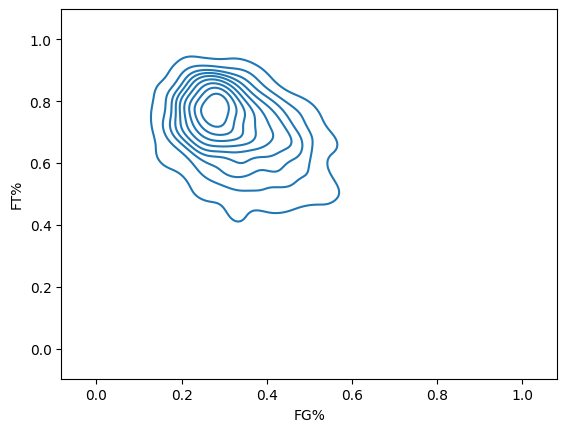

In [ ]:
#Gradient contour line plot
import seaborn as sns
#plt.scatter(interpolated_df['Season'], interpolated_df['FG%'], color='orange')
sns.kdeplot(data=minmax_scaled, x="FG%", y='FT%')
plt.show()

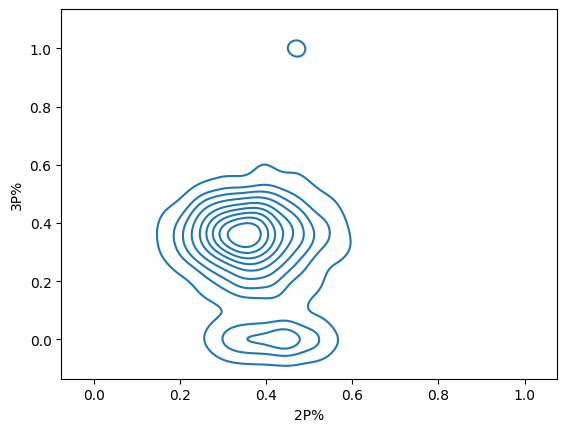

In [ ]:
sns.kdeplot(data=minmax_scaled, x="2P%", y='3P%')
plt.show()

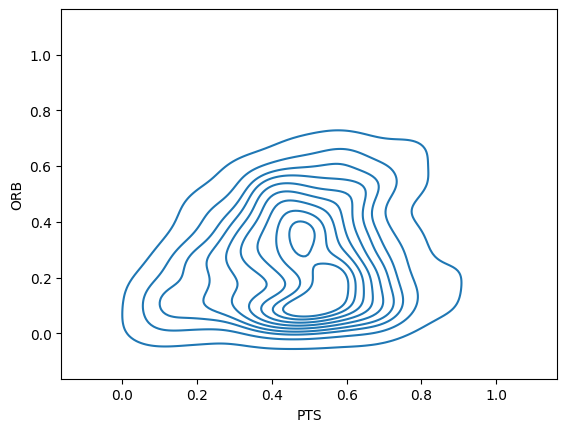

In [ ]:
sns.kdeplot(data=minmax_scaled, x="PTS", y='ORB')
plt.show()

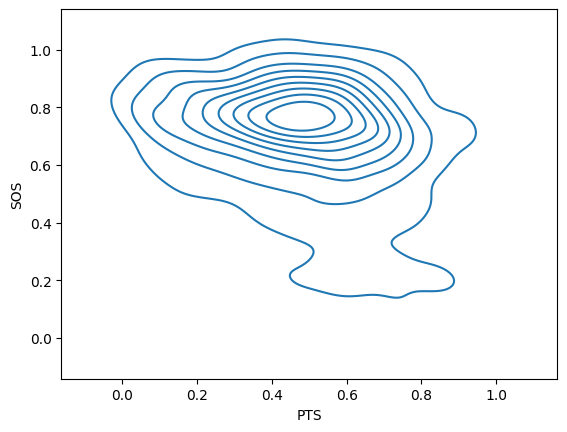

In [ ]:
#Strength of schedule SOS	; scoring
sns.kdeplot(data=minmax_scaled, x="PTS", y='SOS')
plt.show()

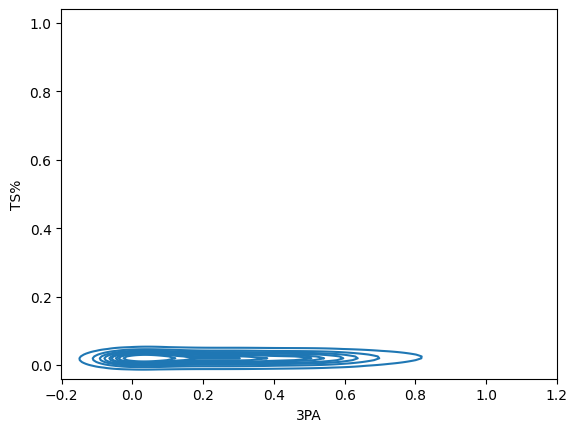

In [ ]:
sns.kdeplot(data=minmax_scaled, x="3PA", y='TS%')
plt.show()

SARIMA model inputs:

d = degree of first differencing involved. Order of integration and can be calculated as the number of transformations needed to make the time series stationary.

p = order of the Autoregressive (AR) part. Determined through the PACF (Partial Autocorrelation Function) plot, which shows the autocorrelations which measure the relationship between an observation and its previous one.

q = order of the moving average (MA) part. Can be determined through the ACF (Autocorrelation Function) plot.

Both the ACF and PACF assume stationarity of the time series; where the underlying statistical properties are fixed and do not change over time.

In [ ]:
interpolated_df.VORP=interpolated_df.VORP.astype(float)
X = interpolated_df.loc[:, ~interpolated_df.columns.isin(['Player', 'College', 'Season', 'School', 'Conf'])]
y = interpolated_df.VORP

In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot_acf(X.values, lags=15)
# plot_pacf(X.values, lags=15, method='ols')

In [ ]:
#Plot the seasonal stats to see time series trend
#Seasonal data use SARIMA; seasonal_order set up
from statsmodels.tsa.statespace.sarimax import SARIMAX
p=1
d=0
q=1
model=SARIMAX(y, X, order=(p,d,q),seasonal_order=(1,0,1,12))
model_fit = model.fit(disp=1,solver='powell')

In [ ]:
model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
ndiffs(interpolated_df['PTS'])

In [ ]:
start_forecast = 100
pred = model_fit.get_prediction(start=start_forecast, dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predictions', alpha=.5)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Energy')
plt.legend()

plt.show()

In [ ]:
#TODO: run linear regression on 2000-2018 interpolated data
#TODO: run random forest

#VORP ANALYSIS

In [ ]:
td=os.path.join(root, 'Player_IDs.csv') #check
ua_data=pd.read_csv(td)
#ua_data.dropna(axis=0,  inplace=True)

In [ ]:
college_df=college_df[~college_df.School.isna()]
#college_df

In [ ]:
#ua_data
cd_data=pd.merge(college_df, distinct_szns, how="inner", on='Player')
cd_data.head()
cd_data['VORP']=cd_data['VORP'].astype(float)
cd_data['Num_szns']=cd_data['Num_szns'].astype(float)
cd_data['Seasonal_VORP']=cd_data['VORP']/cd_data['Num_szns']
cd_data.head()

,Unnamed: 0,YEAR,Player,College,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,PER,TS%,eFG%,3PAr,FTr,PProd,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM,VORP,Num_szns,Seasonal_VORP
0,0,2018.0,Deandre Ayton,Arizona,2017-18,Arizona,Pac-12,35.0,35.0,33.5,7.9,12.9,0.612,7.5,11.9,0.635,0.3,1.0,0.343,4.0,5.5,0.733,3.4,8.2,11.6,1.6,0.6,1.9,2.0,2.3,20.1,6.84,32.6,0.650,0.625,0.078,0.424,666.0,13.5,28.2,21.4,10.2,1.0,6.1,11.3,26.6,5.5,2.1,7.6,0.259,8.6,2.4,11.0,7.2,5.0,1.44
1,1,2018.0,Deandre Ayton,NaN,Career,Arizona,Pac-12,35.0,35.0,33.5,7.9,12.9,0.612,7.5,11.9,0.635,0.3,1.0,0.343,4.0,5.5,0.733,3.4,8.2,11.6,1.6,0.6,1.9,2.0,2.3,20.1,6.84,32.6,0.650,0.625,0.078,0.424,666.0,13.5,28.2,21.4,10.2,1.0,6.1,11.3,26.6,5.5,2.1,7.6,0.259,8.6,2.4,11.0,7.2,5.0,1.44
2,2,2018.0,Marvin Bagley III,Duke,2017-18,Duke,ACC,33.0,32.0,33.9,8.2,13.3,0.614,7.5,11.6,0.647,0.7,1.8,0.397,4.0,6.3,0.627,4.0,7.1,11.1,1.5,0.8,0.9,2.3,1.8,21.0,9.70,30.6,0.643,0.640,0.132,0.475,630.0,13.8,21.5,17.9,8.8,1.4,2.6,12.2,26.3,4.8,2.1,6.9,0.248,8.8,2.0,10.8,0.0,5.0,0.00
3,3,2018.0,Marvin Bagley III,NaN,Career,Duke,ACC,33.0,32.0,33.9,8.2,13.3,0.614,7.5,11.6,0.647,0.7,1.8,0.397,4.0,6.3,0.627,4.0,7.1,11.1,1.5,0.8,0.9,2.3,1.8,21.0,9.70,30.6,0.643,0.640,0.132,0.475,630.0,13.8,21.5,17.9,8.8,1.4,2.6,12.2,26.3,4.8,2.1,6.9,0.248,8.8,2.0,10.8,0.0,5.0,0.00
4,4,2018.0,Jaren Jackson Jr.,Michigan State,2017-18,Michigan State,Big Ten,35.0,34.0,21.8,3.4,6.6,0.513,2.3,3.9,0.596,1.1,2.7,0.396,3.0,3.8,0.797,1.5,4.3,5.8,1.1,0.6,3.0,1.8,3.2,10.9,7.10,26.9,0.647,0.595,0.414,0.573,347.0,8.8,19.7,15.0,9.3,1.6,14.3,17.4,23.5,2.3,2.2,4.6,0.239,4.4,7.3,11.7,4.4,5.0,0.88


In [ ]:
cd_data.Seasonal_VORP=cd_data.Seasonal_VORP.astype(float)
cd_data[cd_data.Seasonal_VORP==cd_data.Seasonal_VORP.min()]

,Unnamed: 0,YEAR,Player,College,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,PER,TS%,eFG%,3PAr,FTr,PProd,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM,VORP,Num_szns,Seasonal_VORP
891,992,2007.0,Al Thornton,Florida State,2003-04,Florida State,ACC,30.0,0.0,7.9,1.0,1.9,0.517,0.9,1.7,0.529,0.1,0.2,0.429,0.7,1.4,0.500,0.6,1.2,1.8,0.2,0.2,0.2,0.5,1.4,2.8,8.31,NaN,0.539,0.543,0.121,0.724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.1,NaN,0.3,0.5,0.8,0.142,NaN,NaN,NaN,-3.2,4.0,-0.8
892,993,2007.0,Al Thornton,NaN,2004-05,Florida State,ACC,29.0,4.0,18.0,3.5,6.4,0.543,3.3,5.9,0.564,0.1,0.5,0.286,2.0,3.7,0.538,1.7,2.8,4.4,0.7,0.5,0.6,1.4,2.4,9.1,8.99,NaN,0.556,0.554,0.075,0.570,NaN,NaN,NaN,14.6,9.3,NaN,2.5,14.5,26.9,1.2,0.6,1.8,0.141,NaN,NaN,NaN,-3.2,4.0,-0.8
893,994,2007.0,Al Thornton,NaN,2005-06,Florida State,ACC,30.0,30.0,29.0,5.7,11.0,0.518,5.0,9.6,0.524,0.7,1.4,0.476,4.1,5.5,0.744,2.9,4.0,6.9,1.2,1.0,0.3,2.4,2.5,16.1,4.86,NaN,0.593,0.548,0.127,0.497,NaN,NaN,NaN,14.7,9.1,NaN,0.8,15.2,26.9,2.8,1.5,4.3,0.197,NaN,NaN,NaN,-3.2,4.0,-0.8
894,995,2007.0,Al Thornton,NaN,2006-07,Florida State,ACC,35.0,35.0,31.2,7.0,13.1,0.530,5.9,10.8,0.549,1.0,2.3,0.444,4.7,6.0,0.790,3.0,4.1,7.2,0.7,1.5,1.1,2.5,2.7,19.7,8.63,NaN,0.616,0.570,0.176,0.457,NaN,NaN,NaN,14.6,5.0,NaN,2.7,13.5,30.0,4.5,2.1,6.6,0.241,NaN,NaN,NaN,-3.2,4.0,-0.8
895,996,2007.0,Al Thornton,NaN,Career,Florida State,ACC,124.0,69.0,22.0,4.4,8.3,0.528,3.9,7.2,0.543,0.5,1.2,0.438,3.0,4.2,0.701,2.1,3.1,5.2,0.7,0.8,0.6,1.7,2.3,12.3,7.69,NaN,0.593,0.559,0.139,0.505,NaN,NaN,NaN,14.6,7.3,NaN,2.0,14.4,28.3,8.9,4.6,13.6,0.199,NaN,NaN,NaN,-3.2,4.0,-0.8


In [ ]:
len(cd_data)

1489

In [ ]:
#as_data

In [ ]:
cd_data.Player
as_data.Player
joined_df=pd.merge(cd_data,  as_data, how="inner", on=['Player'])
print("Number of all-stars in our dataset:", len(joined_df))
joined_df.Seasonal_VORP=joined_df.Seasonal_VORP.astype(float)
avg_asvorp=joined_df.Seasonal_VORP.mean()
print("Average VORP of all-stars in our dataset", avg_asvorp)

Number of all-stars in our dataset: 226
Average VORP of all-stars in our dataset 2.0410494646552144


In [ ]:
joined_df.Seasonal_VORP.describe()

count    226.000000
mean       2.041049
std        1.272628
min       -0.258333
25%        1.185417
50%        1.770000
75%        2.515385
max        5.414286
Name: Seasonal_VORP, dtype: float64

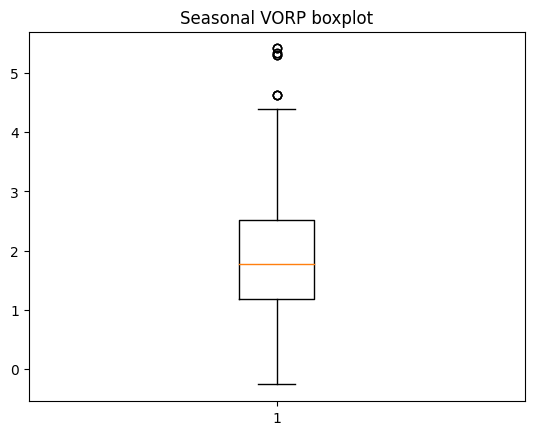

In [ ]:
plt.boxplot(joined_df.Seasonal_VORP)
plt.title('Seasonal VORP boxplot')
plt.show()

In [ ]:
joined_df[joined_df.Seasonal_VORP==np.max(joined_df.Seasonal_VORP)]

,YEAR,Player,College,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,PER,TS%,eFG%,3PAr,FTr,PProd,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM,VORP,Num_szns,Seasonal_VORP
92,2009.0,James Harden,Arizona State,2007-08,Arizona State,Pac-10,34.0,33.0,34.1,5.8,10.9,0.527,4.5,7.8,0.576,1.3,3.2,0.407,5.0,6.6,0.754,1.3,4.0,5.3,3.2,2.1,0.6,2.6,2.1,17.8,6.28,NaN,0.632,0.586,0.290,0.602,NaN,NaN,NaN,10.3,24.7,NaN,1.3,15.7,28.3,4.9,1.8,6.7,0.231,NaN,NaN,NaN,75.8,14.0,5.414286
93,2009.0,James Harden,NaN,2008-09,Arizona State,Pac-10,35.0,35.0,35.8,6.3,12.9,0.489,4.7,8.3,0.564,1.7,4.7,0.356,5.8,7.7,0.756,1.4,4.2,5.6,4.2,1.7,0.3,3.4,2.8,20.1,7.82,NaN,0.607,0.553,0.361,0.597,NaN,NaN,NaN,10.4,29.2,NaN,0.8,16.9,32.5,5.1,2.0,7.2,0.229,NaN,NaN,NaN,75.8,14.0,5.414286
94,2009.0,James Harden,NaN,Career,Arizona State,Pac-10,69.0,68.0,35.0,6.0,11.9,0.506,4.6,8.0,0.570,1.5,3.9,0.376,5.4,7.2,0.755,1.3,4.1,5.4,3.7,1.9,0.4,3.0,2.5,19.0,7.05,NaN,0.618,0.568,0.329,0.600,NaN,NaN,NaN,10.3,27.0,NaN,1.0,16.4,30.5,10.0,3.8,13.8,0.230,NaN,NaN,NaN,75.8,14.0,5.414286


In [ ]:
joined_df[joined_df.Seasonal_VORP==np.min(joined_df.Seasonal_VORP)]

,YEAR,Player,College,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,PER,TS%,eFG%,3PAr,FTr,PProd,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM,VORP,Num_szns,Seasonal_VORP
221,2000.0,Jamaal Magloire,Kentucky,1996-97,Kentucky,SEC,40.0,21.0,15.7,1.9,3.8,0.490,1.9,3.8,0.490,0.0,0.0,NaN,1.1,2.1,0.549,NaN,NaN,4.4,0.4,0.6,2.0,1.6,3.0,4.9,9.26,NaN,0.508,0.490,0.0,0.536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,0.5,4.5,5.0,0.317,NaN,NaN,NaN,-3.1,12.0,-0.258333
222,2000.0,Jamaal Magloire,NaN,1997-98,Kentucky,SEC,38.0,12.0,14.9,2.0,4.2,0.487,2.0,4.2,0.487,0.0,0.0,NaN,1.1,1.7,0.672,NaN,NaN,4.2,0.3,0.3,1.7,1.2,2.6,5.2,9.85,NaN,0.523,0.487,0.0,0.405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,2.3,2.9,0.203,NaN,NaN,NaN,-3.1,12.0,-0.258333
223,2000.0,Jamaal Magloire,NaN,1998-99,Kentucky,SEC,34.0,6.0,19.6,2.8,5.2,0.531,2.8,5.2,0.531,0.0,0.0,NaN,1.4,2.5,0.576,NaN,NaN,4.4,0.5,0.5,1.9,1.2,2.3,7.0,10.01,NaN,0.545,0.531,0.0,0.480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.2,NaN,1.1,2.8,3.8,0.229,NaN,NaN,NaN,-3.1,12.0,-0.258333
224,2000.0,Jamaal Magloire,NaN,1999-00,Kentucky,SEC,33.0,33.0,29.6,4.5,9.0,0.500,4.5,9.0,0.500,0.0,0.0,NaN,4.2,6.2,0.685,NaN,NaN,9.1,0.5,0.5,1.7,2.9,2.8,13.2,12.71,NaN,0.554,0.500,0.0,0.686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.5,NaN,2.2,3.3,5.6,0.228,NaN,NaN,NaN,-3.1,12.0,-0.258333
225,2000.0,Jamaal Magloire,NaN,Career,Kentucky,SEC,145.0,72.0,19.6,2.7,5.4,0.503,2.7,5.4,0.503,0.0,0.0,NaN,1.9,3.0,0.636,NaN,NaN,5.4,0.4,0.5,1.8,1.7,2.7,7.3,10.46,NaN,0.537,0.503,0.0,0.554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,4.4,12.8,17.2,0.243,NaN,NaN,NaN,-3.1,12.0,-0.258333


In [ ]:
#players in our dataset of nba players who played in college who have vorps >= average all-star vorp threshold
nba_aevorp=joined_df[joined_df.Seasonal_VORP.apply(lambda x: x>=avg_asvorp)]
print("percentage of all-star players from 1979 to 2018 who have a seasonal vorp >= to the threshold:", np.round(100*len(nba_aevorp)/len(joined_df), 2),'%')

percentage of all-star players from 1979 to 2018 who have a seasonal vorp >= to the threshold: 42.48 %


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, mean_squared_error
root='drive/MyDrive/PS2_FinalProject'
td=os.path.join(root, 'Player_IDs.csv')
ua_data=pd.read_csv(td)
ua_data.head(2)
ua_data.columns #think of ways to feature engineer player stats
#Maybe make the 'Pk' pick as a new feature
pick_df=pd.get_dummies(ua_data['Pk'])
concat_ua=pd.concat([ua_data, pick_df], axis=1)
concat_ua.columns=concat_ua.columns.astype(str)

In [ ]:
ua_data=concat_ua

In [ ]:
plt.figure(figsize=(50,10))
# plt.hist(ua_data['FT%'], bins='auto')
# plt.show()

<Figure size 5000x1000 with 0 Axes>

<Figure size 5000x1000 with 0 Axes>

In [ ]:
ua_data

,NBA ID,YEAR,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
0,1629028.0,2018.0,1.0,1.0,PHO,Deandre Ayton,Arizona,5,296,9069,4944,3097,491,0.597,0.263,0.752,30.6,16.7,10.5,1.7,30.4,0.161,1.2,7.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1628963.0,2018.0,2.0,2.0,SAC,Marvin Bagley III,Duke,5,199,4905,2628,1445,175,0.505,0.283,0.67,24.6,13.2,7.3,0.9,8.8,0.086,-2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NaN,2018.0,3.0,3.0,ATL,Luka Dončić,NaN,5,321,10996,8841,2747,2560,0.466,0.339,0.737,34.3,27.5,8.6,8,38.3,0.167,7.3,25.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1628991.0,2018.0,4.0,4.0,MEM,Jaren Jackson Jr.,Michigan State,5,254,6909,4060,1380,282,0.459,0.349,0.792,27.2,16,5.4,1.1,17.7,0.123,0.5,4.4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1629027.0,2018.0,5.0,5.0,DAL,Trae Young,Oklahoma,5,342,11570,8753,1273,3168,0.439,0.352,0.876,33.8,25.6,3.7,9.3,32.3,0.134,3.2,15.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,77273.0,1979.0,18.0,18.0,KCK,Reggie King,Alabama,6,438,11345,3898,2707,691,0.514,0,0.699,25.9,8.9,6.2,1.6,24.8,0.105,-0.4,4.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1142,77827.0,1979.0,19.0,19.0,SAS,Wiley Peck,Mississippi State,1,52,628,180,183,33,0.432,0,0.618,12.1,3.5,3.5,0.6,0.3,0.023,-4.2,-0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1143,NaN,1979.0,20.0,20.0,UTA,Larry Knight,Loyola Chicago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1144,78570.0,1979.0,21.0,21.0,NYK,Sly Williams,Rhode Island,7,305,6617,3327,1287,603,0.478,0.162,0.692,21.7,10.9,4.2,2,13.4,0.097,0.6,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
X=ua_data[['FT%', 'FG%', '3P%', 'AST']] #'1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0'
y=ua_data['VORP']

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
LR=linear_model.LinearRegression()
LR.fit(X_train, y_train)

In [ ]:
LR.coef_

In [ ]:
cv_results = cross_validate(LR, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
np.abs(np.mean(cv_results['test_score']))

In [ ]:
predicted_vorp=LR.predict(X_test)
MAE = mean_absolute_error(y_test, predicted_vorp)
MAE

Using FT% and FG% adding 3P%
adding AST, and not adding the Top 10 picks as 1-hot encoding features (Used only 9 because of multicollinearity), MAE improved to 5.74

**Start here multicollinearity**

In [ ]:
list(college_vorp.Conf.unique())

In [ ]:
nba_ps=os.path.join(root, 'nba-salaries.csv')
nba_pos_salary=pd.read_csv(nba_ps)
nba_pos_salary.rename(columns={"name":"Player"}, inplace=True)
nba_pos_salary.head()

,rank,Player,position,team,salary,season
0,1,Shaquille O'Neal,C,Los Angeles Lakers,17142000,2000
1,2,Kevin Garnett,PF,Minnesota Timberwolves,16806000,2000
2,3,Alonzo Mourning,C,Miami Heat,15004000,2000
3,4,Juwan Howard,PF,Washington Wizards,15000000,2000
4,5,Scottie Pippen,SF,Portland Trail Blazers,14795000,2000


In [ ]:
nba_pos_salary[nba_pos_salary.Player=='Deandre Ayton']

,rank,Player,position,team,salary,season
8569,145,Deandre Ayton,C,Phoenix Suns,8165160,2019
9062,135,Deandre Ayton,C,Phoenix Suns,9562920,2020


In [ ]:
college_vorp_updated=pd.merge(college_vorp, nba_pos_salary[['Player', 'position', 'salary']], how="inner", on="Player")

In [ ]:
college_vorp_updated.drop_duplicates(subset=['YEAR', 'Player', 'Season', 'Conf'], inplace=True)

In [ ]:
college_vorp_updated

,YEAR,Player,College,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,PER,TS%,eFG%,3PAr,FTr,PProd,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM,VORP,NBA ID,Rk,Pk,Tm,Yrs,MP.1,PTS.1,TRB.1,AST.1,WS/48,position,salary
0,2018.0,Deandre Ayton,Arizona,2017-18,Arizona,Pac-12,35.0,35.0,33.5,7.9,12.9,0.612,7.5,11.9,0.635,0.3,1.0,0.343,4.0,5.5,0.733,3.4,8.2,11.6,1.6,0.6,1.9,2.0,2.3,20.1,6.84,32.6,0.650,0.625,0.078,0.424,666.0,13.5,28.2,21.4,10.2,1.0,6.1,11.3,26.6,5.5,2.1,7.6,0.259,8.6,2.4,11.0,7.2,1629028.0,1.0,1.0,PHO,5,30.6,16.7,10.5,1.7,0.161,C,8165160
2,2018.0,Deandre Ayton,NaN,Career,Arizona,Pac-12,35.0,35.0,33.5,7.9,12.9,0.612,7.5,11.9,0.635,0.3,1.0,0.343,4.0,5.5,0.733,3.4,8.2,11.6,1.6,0.6,1.9,2.0,2.3,20.1,6.84,32.6,0.650,0.625,0.078,0.424,666.0,13.5,28.2,21.4,10.2,1.0,6.1,11.3,26.6,5.5,2.1,7.6,0.259,8.6,2.4,11.0,7.2,1629028.0,1.0,1.0,PHO,5,30.6,16.7,10.5,1.7,0.161,C,8165160
4,2018.0,Marvin Bagley III,Duke,2017-18,Duke,ACC,33.0,32.0,33.9,8.2,13.3,0.614,7.5,11.6,0.647,0.7,1.8,0.397,4.0,6.3,0.627,4.0,7.1,11.1,1.5,0.8,0.9,2.3,1.8,21.0,9.70,30.6,0.643,0.640,0.132,0.475,630.0,13.8,21.5,17.9,8.8,1.4,2.6,12.2,26.3,4.8,2.1,6.9,0.248,8.8,2.0,10.8,0.0,1628963.0,2.0,2.0,SAC,5,24.6,13.2,7.3,0.9,0.086,PF,7305600
6,2018.0,Marvin Bagley III,NaN,Career,Duke,ACC,33.0,32.0,33.9,8.2,13.3,0.614,7.5,11.6,0.647,0.7,1.8,0.397,4.0,6.3,0.627,4.0,7.1,11.1,1.5,0.8,0.9,2.3,1.8,21.0,9.70,30.6,0.643,0.640,0.132,0.475,630.0,13.8,21.5,17.9,8.8,1.4,2.6,12.2,26.3,4.8,2.1,6.9,0.248,8.8,2.0,10.8,0.0,1628963.0,2.0,2.0,SAC,5,24.6,13.2,7.3,0.9,0.086,PF,7305600
8,2018.0,Jaren Jackson Jr.,Michigan State,2017-18,Michigan State,Big Ten,35.0,34.0,21.8,3.4,6.6,0.513,2.3,3.9,0.596,1.1,2.7,0.396,3.0,3.8,0.797,1.5,4.3,5.8,1.1,0.6,3.0,1.8,3.2,10.9,7.10,26.9,0.647,0.595,0.414,0.573,347.0,8.8,19.7,15.0,9.3,1.6,14.3,17.4,23.5,2.3,2.2,4.6,0.239,4.4,7.3,11.7,4.4,1628991.0,4.0,4.0,MEM,5,27.2,16,5.4,1.1,0.123,PF,5915040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11285,2000.0,Mark Madsen,Stanford,1996-97,Stanford,Pac-10,25.0,0.0,16.4,2.0,3.8,0.537,2.0,3.8,0.537,0.0,0.0,NaN,1.8,3.0,0.608,NaN,NaN,5.0,0.3,0.2,0.4,0.9,3.1,5.9,9.21,NaN,0.565,0.537,0.000,0.779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN,0.7,1.0,1.8,0.172,NaN,NaN,NaN,-2.9,2058.0,29.0,29.0,LAL,9,11.8,2.2,2.6,0.4,0.074,PF,707000
11298,2000.0,Mark Madsen,NaN,1997-98,Stanford,Pac-10,27.0,24.0,26.1,4.3,7.3,0.589,4.3,7.3,0.592,0.0,0.0,0.000,3.1,4.9,0.629,3.4,4.7,8.1,0.7,0.4,0.4,1.3,2.6,11.7,8.12,NaN,0.606,0.589,0.005,0.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.6,3.7,0.207,NaN,NaN,NaN,-2.9,2058.0,29.0,29.0,LAL,9,11.8,2.2,2.6,0.4,0.074,PF,707000
11311,2000.0,Mark Madsen,NaN,1998-99,Stanford,Pac-10,33.0,33.0,29.4,4.6,7.7,0.605,4.6,7.6,0.607,0.0,0.0,0.000,3.8,6.6,0.583,NaN,NaN,9.0,0.5,0.5,0.6,1.5,2.3,13.1,10.36,NaN,0.607,0.605,0.004,0.862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.5,NaN,3.1,3.4,6.5,0.267,NaN,NaN,NaN,-2.9,2058.0,29.0,29.0,LAL,9,11.8,2.2,2.6,0.4,0.074,PF,707000
11324,2000.0,Mark Madsen,NaN,1999-00,Stanford,Pac-10,23.0,20.0,27.3,4.7,8.0,0.587,4.7,8.0,0.587,0.0,0.0,NaN,2.8,4.9,0.575,NaN,NaN,9.3,1.1,0.6,0.9,1.5,2.3,12.2,7.12,NaN,0.591,0.587,0.000,0.614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.5,NaN,1.8,2.4,4.2,0.269,NaN,NaN,NaN,-2.9,2058.0,29.0,29.0,LAL,9,11.8,2.2,2.6,0.4,0.074,PF,707000


# update the vorp here with NBA seasonal vorp

In [ ]:
df_2000_2010=os.path.join(root, 'early_2000_2010s.csv')
df_2010_2018=os.path.join(root, '20102018_df.csv')
newdf_2000_2010=pd.read_csv(df_2000_2010)
newdf_2010_2018=pd.read_csv(df_2010_2018)
merged2000_2018=pd.concat([newdf_2000_2010, newdf_2010_2018])
merged2000_2018.drop_duplicates(inplace=True)
merged2000_2018
NBA_players20002018=list(merged2000_2018.full_name.unique())
distinct_szns=merged2000_2018.groupby('full_name')['GROUP_VALUE'].nunique()
distinct_szns=distinct_szns.to_frame()
distinct_szns.reset_index(inplace=True)
distinct_szns.rename(columns={'full_name':'Player','GROUP_VALUE':'Num_szns'}, inplace=True)
distinct_szns.columns
#distinct_szns[distinct_szns['Player']=='Deandre Ayton']
szns_vorp_df=pd.merge(college_vorp_updated, distinct_szns, how="inner", on='Player')
szns_vorp_df['Seasonal_VORP']=szns_vorp_df['VORP']/szns_vorp_df['Num_szns']
college_vorp_updated=szns_vorp_df

In [ ]:
len(distinct_szns.Player.values)

554

In [ ]:
college_vorp_updated.Seasonal_VORP.isna().sum()

0

In [ ]:
college_vorp_updated[college_vorp_updated.position==' NA']

,YEAR,Player,College,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,PER,TS%,eFG%,3PAr,FTr,PProd,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM,VORP,NBA ID,Rk,Pk,Tm,Yrs,MP.1,PTS.1,TRB.1,AST.1,WS/48,position,salary,Num_szns,Seasonal_VORP


In [ ]:
college_vorp_updated.loc[(college_vorp_updated.Player=='Eddy Curry'),'position']=' C'

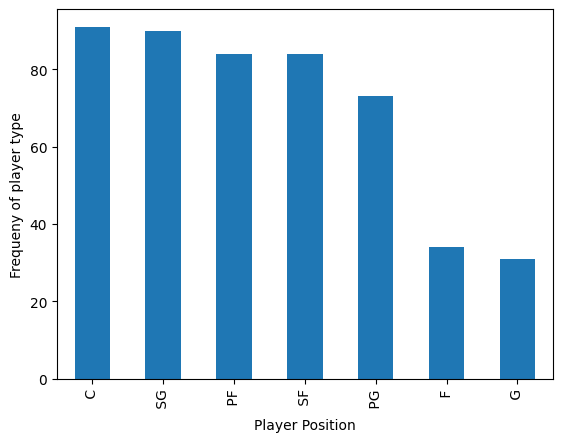

In [ ]:
unique_players=college_vorp_updated.drop_duplicates(subset=['Player'])
unique_players.position.value_counts().plot(kind='bar')
plt.ylabel('Frequeny of player type')
plt.xlabel('Player Position')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
dfs_list=[]
college_vorp=college_vorp_updated
for cf in list(college_vorp.Conf.unique()):
  cv_cf=college_vorp[college_vorp.Conf==cf]
  unchanged_df=cv_cf.loc[:, cv_cf.columns.isin(['YEAR','Player','position', 'salary','College','Season','School','Conf','G','GS','MP','SOS','PER','PProd','OWS','DWS','WS','WS/40','OBPM','DBPM','BPM','VORP', 'Seasonal_VORP', 'Num_szns'])]
  changed_df=cv_cf.loc[:, ~cv_cf.columns.isin(['YEAR','Player','position', 'salary','College','Season','School','Conf','G','GS','MP','SOS','PER','PProd','OWS','DWS','WS','WS/40','OBPM','DBPM','BPM','VORP', 'Seasonal_VORP', 'Num_szns'])]
  changed_df.fillna(changed_df.median(), inplace=True)
  merged_df=pd.concat([unchanged_df, changed_df], axis=1)
  dfs_list.append(merged_df)
all_dfs=pd.concat(dfs_list)
college_vorp=all_dfs

In [ ]:
college_vorp.head()

,YEAR,Player,College,Season,School,Conf,G,GS,MP,SOS,PER,PProd,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM,VORP,position,salary,Num_szns,Seasonal_VORP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,NBA ID,Rk,Pk,Tm,Yrs,MP.1,PTS.1,TRB.1,AST.1,WS/48
0,2018.0,Deandre Ayton,Arizona,2017-18,Arizona,Pac-12,35.0,35.0,33.5,6.84,32.6,666.0,5.5,2.1,7.6,0.259,8.6,2.4,11.0,7.2,C,8165160,5,1.44,7.9,12.9,0.612,7.5,11.9,0.635,0.3,1.0,0.343,4.0,5.5,0.733,3.4,8.2,11.6,1.6,0.6,1.9,2.0,2.3,20.1,0.650,0.625,0.078,0.424,13.5,28.2,21.4,10.2,1.0,6.1,11.3,26.6,1629028.0,1.0,1.0,PHO,5,30.6,16.7,10.5,1.7,0.161
1,2018.0,Deandre Ayton,NaN,Career,Arizona,Pac-12,35.0,35.0,33.5,6.84,32.6,666.0,5.5,2.1,7.6,0.259,8.6,2.4,11.0,7.2,C,8165160,5,1.44,7.9,12.9,0.612,7.5,11.9,0.635,0.3,1.0,0.343,4.0,5.5,0.733,3.4,8.2,11.6,1.6,0.6,1.9,2.0,2.3,20.1,0.650,0.625,0.078,0.424,13.5,28.2,21.4,10.2,1.0,6.1,11.3,26.6,1629028.0,1.0,1.0,PHO,5,30.6,16.7,10.5,1.7,0.161
29,2018.0,Troy Brown Jr.,Oregon,2017-18,Oregon,Pac-12,35.0,35.0,31.2,4.84,16.6,424.0,1.5,1.6,3.1,0.114,1.4,2.3,3.7,0.3,SF,2749080,5,0.06,4.1,9.2,0.444,3.2,6.1,0.524,0.9,3.1,0.291,2.2,3.0,0.743,1.5,4.7,6.2,3.2,1.6,0.2,2.5,2.2,11.3,0.532,0.494,0.342,0.326,5.9,18.0,12.0,18.7,2.9,0.8,18.8,21.0,1628972.0,15.0,15.0,WAS,5,19.9,6.6,3.9,1.5,0.062
30,2018.0,Troy Brown Jr.,NaN,Career,Oregon,Pac-12,35.0,35.0,31.2,4.84,16.6,424.0,1.5,1.6,3.1,0.114,1.4,2.3,3.7,0.3,SF,2749080,5,0.06,4.1,9.2,0.444,3.2,6.1,0.524,0.9,3.1,0.291,2.2,3.0,0.743,1.5,4.7,6.2,3.2,1.6,0.2,2.5,2.2,11.3,0.532,0.494,0.342,0.326,5.9,18.0,12.0,18.7,2.9,0.8,18.8,21.0,1628972.0,15.0,15.0,WAS,5,19.9,6.6,3.9,1.5,0.062
55,2018.0,Aaron Holiday,UCLA,2015-16,UCLA,Pac-12,32.0,32.0,31.7,9.69,11.4,351.0,0.5,0.9,1.4,0.054,-0.3,1.9,1.5,-0.4,PG,1911960,5,-0.08,3.6,9.0,0.394,2.3,6.1,0.383,1.2,2.9,0.419,2.0,2.8,0.727,0.6,2.4,3.0,4.0,1.4,0.3,2.9,3.2,10.3,0.500,0.462,0.322,0.304,2.0,7.8,5.0,21.1,2.5,0.8,21.8,19.9,1628988.0,23.0,23.0,IND,5,17.4,6.7,1.7,2.2,0.05


In [ ]:
null_sum=college_vorp.isna().sum()

cols_wanted=['Player', 'Conf', 'YEAR', 'position']+list(null_sum[null_sum>0].index)
df=college_vorp[cols_wanted]
#df[df.loc[:, ~df.columns.isin(['YEAR','Player','College','Season','School','Conf','G','GS','MP','SOS','PER','PProd','OWS','DWS','WS','WS/40','OBPM','DBPM','BPM','VORP'])].isnull().any(axis=1)]

In [ ]:
nv_players=df[df.loc[:, ~df.columns.isin(['YEAR','Player','College','Season','School','Conf','G','GS','MP','SOS','PER','PProd','OWS','DWS','WS','WS/40','OBPM','DBPM','BPM','VORP'])].isna().any(axis=1)]
#nv_players[['Player', 'position']+list(null_sum[null_sum>0].index)]

In [ ]:
cols_wanted

['Player',
 'Conf',
 'YEAR',
 'position',
 'College',
 'Season',
 'School',
 'G',
 'GS',
 'MP',
 'SOS',
 'PER',
 'PProd',
 'OWS',
 'DWS',
 'WS',
 'WS/40',
 'OBPM',
 'DBPM',
 'BPM',
 '3P%',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'USG%']

In [ ]:
cols_impute=['3P%',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'USG%']
for col in cols_impute:
  college_vorp[col]=college_vorp[col].fillna(college_vorp.groupby(['position'])[col].transform('median'))

In [ ]:
#college_vorp.isna().sum()

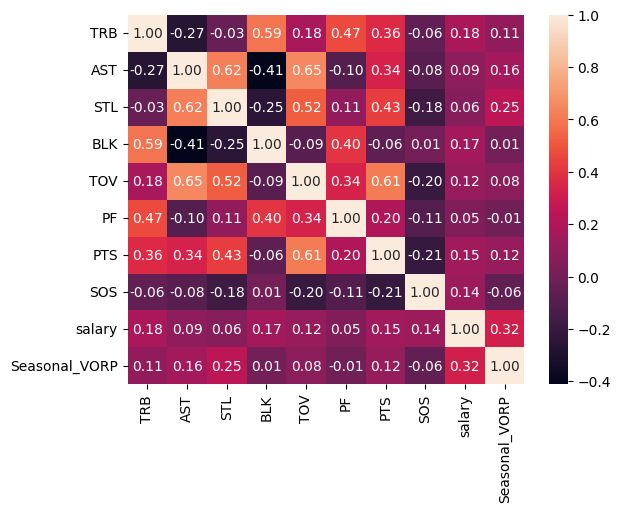

In [ ]:
college_basic_subset = college_vorp[['TRB','AST','STL','BLK','TOV','PF','PTS','SOS', 'salary', 'Seasonal_VORP']]
correlation_mat = college_basic_subset.corr()
tcorr_wr=correlation_mat[correlation_mat.index=='VORP']
sns.heatmap(correlation_mat, fmt='.2f', annot = True) #tcorr_wr
plt.show()

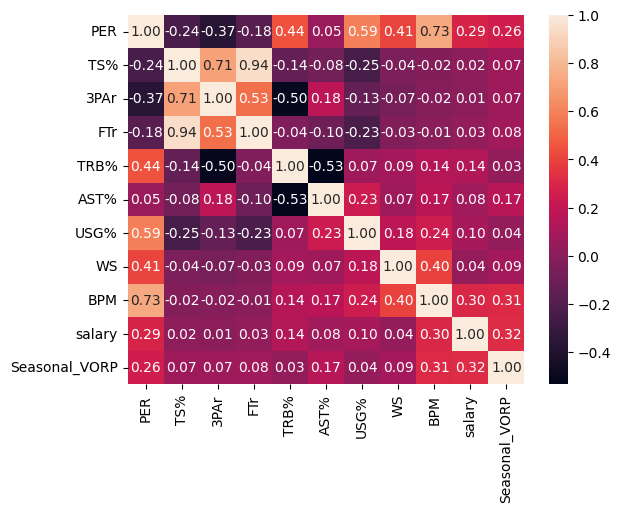

In [ ]:
college_advanced_subset = college_vorp[['PER','TS%','3PAr','FTr','TRB%','AST%','USG%','WS','BPM', 'salary', 'Seasonal_VORP']]
correlation_mat = college_advanced_subset.corr()
tcorr_wr=correlation_mat[correlation_mat.index=='VORP']
sns.heatmap(correlation_mat, fmt='.2f', annot = True) #tcorr_wr
plt.show()

Commonly used cutoff for multicollinearity is a VIF of 5 or higher. Therefore, any columns with a VIF greater than 5 may indicate the presence of multicollinearity.

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the columns to check for multicollinearity
X = college_basic_subset

# Calculate the VIF for each column
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Print the VIF results
print(vif)

In [ ]:
college_vorp.isna().sum()

Impute the college data with the medians of each stat column

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
college_vorp = college_vorp.fillna(college_vorp.median())
college_imputed_nans = college_vorp.loc[:, ~college_vorp.columns.isin(['position', 'salary'])]
college_imputed_nans = college_imputed_nans.loc[:, ~college_imputed_nans.columns.isin(['NBA ID','Rk','Pk','Tm','Yrs', 'MP.1', 'PTS.1', 'TRB.1', 'AST.1','YEAR','Player','College','Season','School','Conf','G','GS','MP','SOS','PER','PProd','OWS','DWS','WS','WS/40','WS/48','OBPM','DBPM','BPM','VORP', 'Seasonal_VORP', 'Num_szns'])]
college_imputed_nans.head()
college_tranform=scaler.fit_transform(college_imputed_nans)
imputed_transf=pd.DataFrame(college_tranform, columns=college_imputed_nans.columns)
pca = PCA(2) #top 2 Principal components
college_data = pca.fit_transform(imputed_transf)

In [ ]:
#len(college_imputed_nans)
len(college_data)

1507

In [ ]:
#college_imputed_nans.columns
imputed_transf.describe()

,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%
count,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03
mean,-4.479201e-17,1.202312e-16,4.561713e-16,-9.429897e-18,5.186443e-16,-9.583133e-16,1.426272e-16,-1.343760e-16,1.131588e-16,-2.828969e-17,-2.546072e-16,3.135441e-16,5.893686e-17,1.225887e-16,-5.917260e-16,1.650232e-17,5.186443e-17,2.216026e-16,6.129433e-16,-1.461634e-16,8.486907e-17,-3.771959e-17,-1.249461e-15,3.064717e-17,5.186443e-17,-2.498923e-16,4.714948e-18,-6.365180e-16,3.771959e-17,2.357474e-17,2.121727e-17,-1.414485e-17,1.225887e-16
std,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00
min,-2.956070e+00,-2.883677e+00,-3.701612e+00,-2.559601e+00,-2.711875e+00,-4.688481e+00,-1.130890e+00,-1.214334e+00,-2.799968e+00,-2.155032e+00,-2.381418e+00,-7.263675e+00,-1.768634e+00,-2.453519e+00,-2.199969e+00,-1.372043e+00,-1.974992e+00,-1.081521e+00,-2.573716e+00,-3.597506e+00,-2.852166e+00,-4.935324e-01,-5.338147e+00,-9.916826e-01,-1.057565e+00,-2.273481e+00,-2.577997e+00,-2.921544e+00,-1.888587e+00,-3.229505e+00,-1.097656e+00,-3.517103e+00,-5.213015e+00
25%,-5.914939e-01,-6.407729e-01,-6.769415e-01,-6.201534e-01,-6.484158e-01,-6.422740e-01,-8.855592e-01,-9.747610e-01,-1.954434e-01,-7.217520e-01,-6.629200e-01,-5.080632e-01,-7.408932e-01,-6.304671e-01,-7.256113e-01,-6.857005e-01,-7.153673e-01,-7.259688e-01,-6.568415e-01,-5.208016e-01,-6.034053e-01,-9.451119e-02,-6.230429e-01,-7.258652e-01,-2.933617e-01,-5.089389e-01,-6.682905e-01,-6.515365e-01,-5.644668e-01,-3.728789e-01,-6.896674e-01,-6.654838e-01,-4.524476e-01
50%,-1.632672e-02,1.714549e-02,-2.009781e-01,-6.602559e-02,1.191754e-03,-4.973321e-02,-1.495671e-01,-1.122988e-01,1.311690e-01,-1.484400e-01,-9.008718e-02,1.338727e-01,-5.573275e-02,-9.030356e-02,-1.185229e-01,-3.113320e-01,-1.755283e-01,-3.704163e-01,-1.091632e-01,5.608044e-02,2.030267e-03,-5.079235e-02,-4.069935e-02,-1.299128e-02,-7.300871e-02,1.202121e-02,-2.025085e-01,-5.456728e-02,-2.525348e-01,-2.225301e-01,-2.816790e-01,-1.194291e-01,-5.155771e-02
75%,6.866554e-01,6.451585e-01,5.974122e-01,6.266341e-01,6.699054e-01,6.105265e-01,7.090904e-01,7.501634e-01,4.159080e-01,5.681998e-01,5.973122e-01,6.739141e-01,6.294277e-01,5.173805e-01,6.620193e-01,4.374050e-01,5.442571e-01,4.592062e-01,5.754347e-01,6.329625e-01,6.723339e-01,-7.767450e-03,5.980000e-01,5.246848e-01,1.250746e-01,4.825658e-01,4.495863e-01,5.551034e-01,4.604529e-01,3.788649e-01,2.079070e-01,5.115675e-01,5.998883e-01
max,3.179047e+00,3.276832e+00,7.813632e+00,3.466539e+00,3.134593e+00,8.008821e+00,4.389051e+00,3.720867e+00,5.574709e+00,4.294727e+00,3.919743e+00,2.925785e+00,4.512004e+00,4.366046e+00,3.784188e+00,4.742643e+00,3.963237e+00,4.844354e+00,4.272263e+00,3.517373e+00,3.310303e+00,2.164347e+01,8.750809e+00,1.592397e+01,2.004006e+01,4.280533e+00,4.827937e+00,3.590755e+00,4.477374e+00,5.039677e+00,4.981371e+00,6.530304e+00,3.531395e+00


2 Dimensions

Ways to use PCA:
- Use PCA on subsets of data to describe a majority of features into "player categories"
  - Separate PCA features fitted on guard stats and big men stats
  - Subset the dataset between guards and big men
- Use PCA to see which variables are capturing the most variance

In [ ]:
print(pd.DataFrame(pca.components_,columns=college_imputed_nans.columns,index = ['PC-1','PC-2']).T)

          PC-1      PC-2
FG    0.164798  0.284124
FGA   0.239040  0.220659
FG%  -0.222351  0.138692
2P    0.024858  0.327197
2PA   0.080206  0.310862
2P%  -0.179315  0.095256
3P    0.272819 -0.036304
3PA   0.281853 -0.038210
3P%   0.083498 -0.018298
FT    0.164922  0.250328
FTA   0.117020  0.277535
FT%   0.223259  0.026376
ORB  -0.179865  0.237427
DRB  -0.072115  0.274871
TRB  -0.114955  0.288050
AST   0.236907 -0.009800
STL   0.203269  0.064484
BLK  -0.199347  0.147676
TOV   0.191330  0.163238
PF   -0.050340  0.174730
PTS   0.209428  0.261686
TS%   0.045666 -0.008187
eFG% -0.126760  0.089891
3PAr  0.199186 -0.110753
FTr   0.007939  0.023302
ORB% -0.210237  0.093011
DRB% -0.152589  0.127421
TRB% -0.230982  0.175653
AST%  0.216319 -0.028386
STL%  0.092280 -0.016335
BLK% -0.223020  0.067731
TOV% -0.052628 -0.092394
USG%  0.134096  0.193829


First Component:
High positive coef:
- FGA
- 3PA
- AST
- PTS
- AST%
- USG%

High negative coef:
- ORB%
- DRB%
- TRB%
- BLK%


---

Second Component:
High positive coef:
- AST%
- TOV%

High negative coef:
- FG
- FGA
- 2P
- 2PA
- FT
- FTA
- DRB
- TRB
- PTS
- DRB%
- TRB%
- USG%

In [ ]:
len(college_imputed_nans.columns)

33

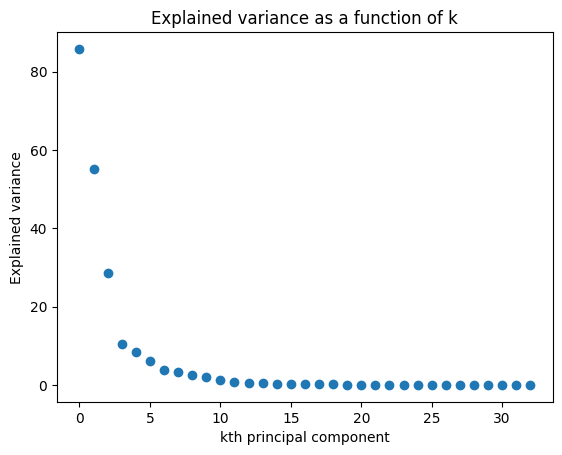

In [ ]:
def get_k_variances(k, train):
    pca = PCA(n_components=k)
    pca.fit(train)

    return pca.explained_variance_

k=33
variances = get_k_variances(k, college_imputed_nans)
k_list = np.arange(0,k)
plt.scatter(k_list, variances)
plt.title("Explained variance as a function of k")
plt.xlabel("kth principal component")
plt.ylabel("Explained variance")
plt.show()

In [ ]:
college_tranform=scaler.fit_transform(college_imputed_nans)
imputed_transf=pd.DataFrame(college_tranform, columns=college_imputed_nans.columns)
pca = PCA(3)
data_pca3 = pca.fit_transform(imputed_transf)
print(pd.DataFrame(pca.components_,columns=college_imputed_nans.columns,index = ['PC-1','PC-2','PC-3']).T)

          PC-1      PC-2      PC-3
FG    0.173185  0.279352  0.070249
FGA   0.245331  0.213327  0.050936
FG%  -0.218508  0.145356  0.065940
2P    0.035284  0.326760 -0.005419
2PA   0.090610  0.308386 -0.032044
2P%  -0.177189  0.102889  0.099284
3P    0.271276 -0.042210  0.144722
3PA   0.280304 -0.044533  0.121008
3P%   0.082449 -0.019353  0.108111
FT    0.171556  0.245512 -0.013473
FTA   0.124743  0.274003 -0.035587
FT%   0.222537  0.020698  0.067408
ORB  -0.173240  0.242530  0.032641
DRB  -0.065098  0.276486  0.032765
TRB  -0.107439  0.291316  0.034908
AST   0.236100 -0.017738 -0.195499
STL   0.205363  0.057988 -0.127736
BLK  -0.195160  0.153322  0.046515
TOV   0.196758  0.155418 -0.178384
PF   -0.046214  0.175508 -0.068388
PTS   0.216610  0.255820  0.068656
TS%   0.045710 -0.009551  0.496148
eFG% -0.125162  0.096268  0.126212
3PAr  0.195920 -0.114104  0.401979
FTr   0.008873  0.022666  0.441651
ORB% -0.207733  0.100020 -0.000928
DRB% -0.149004  0.129016 -0.043167
TRB% -0.226246  0.18

In [ ]:
pca_df=pd.DataFrame(data_pca3, columns=['PC-1','PC-2','PC-3'])
len(pca_df)

1507

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(college_data)

    distortions.append(sum(np.min(cdist(college_data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / college_data.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(college_data, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / college_data.shape[0]
    mapping2[k] = kmeanModel.inertia_

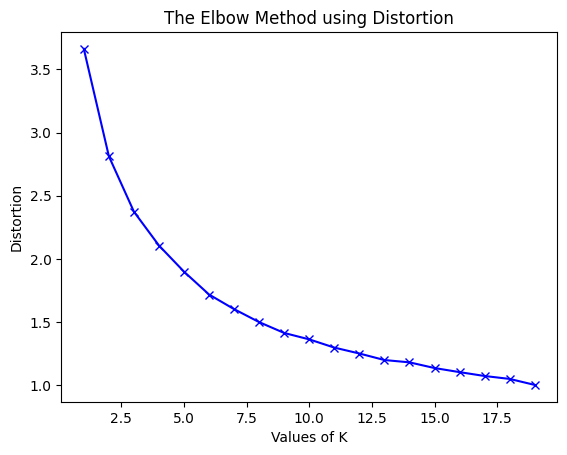

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

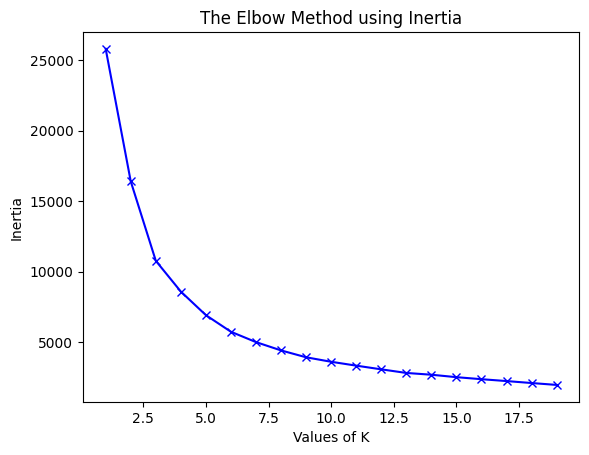

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

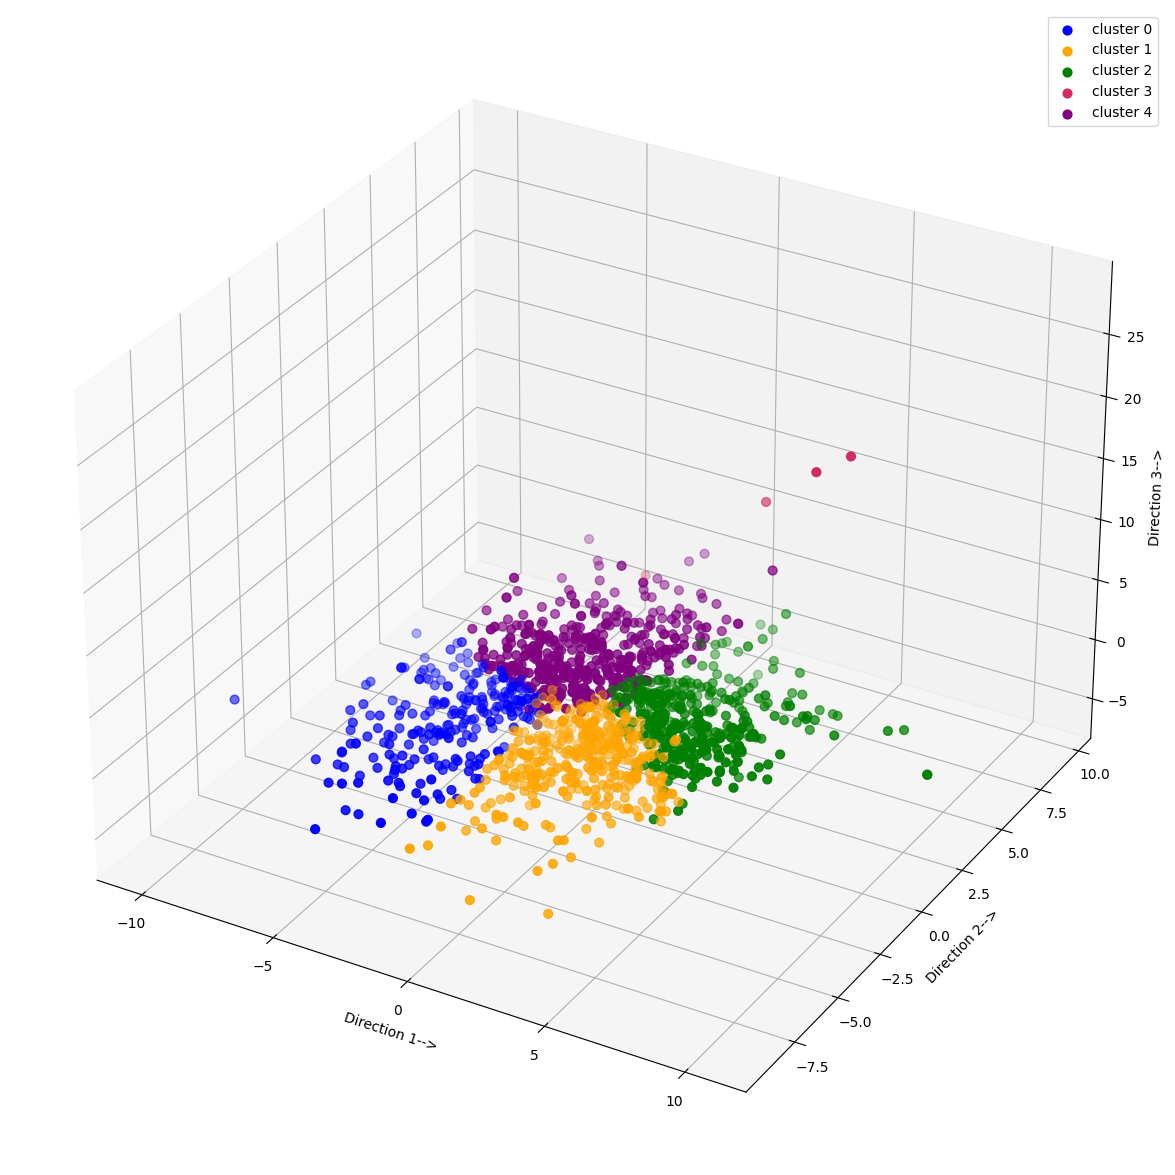

In [ ]:
model = KMeans(n_clusters = 5, init = "k-means++", random_state = 0)
x = data_pca3
y_clusters = model.fit_predict(x)
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Direction 1-->')
ax.set_ylabel('Direction 2-->')
ax.set_zlabel('Direction 3-->')
ax.legend()
plt.show()

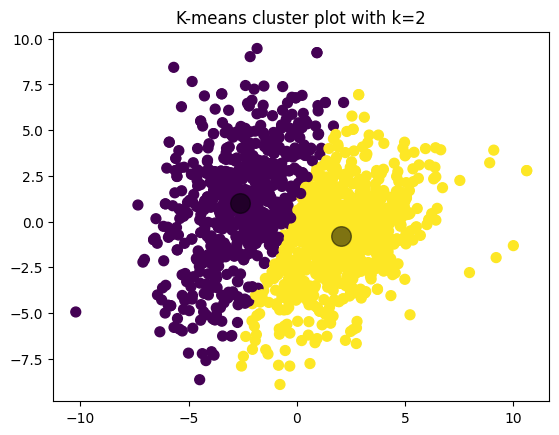

In [ ]:
#Initialize the class object
kmeans = KMeans(n_clusters= 2).fit(college_data)
labels = kmeans.predict(college_data)

plt.scatter(college_data[:, 0], college_data[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.title("K-means cluster plot with k=2")
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

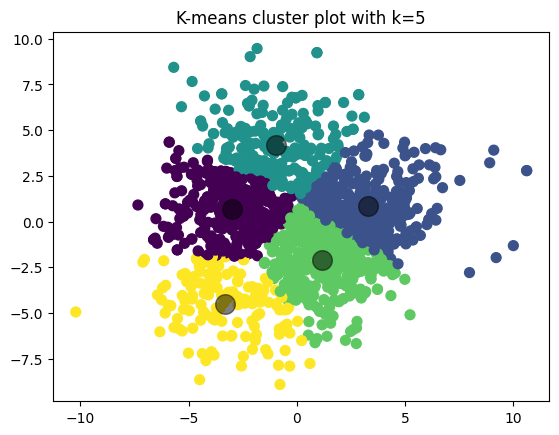

In [ ]:
#Initialize the class object
kmeans = KMeans(n_clusters= 5).fit(college_data)
y_kmeans = kmeans.predict(college_data)

plt.scatter(college_data[:, 0], college_data[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.title("K-means cluster plot with k=5")
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

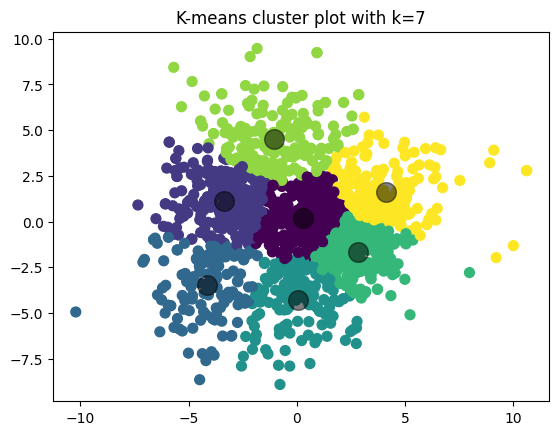

In [ ]:
#Initialize the class object
kmeans = KMeans(n_clusters= 7).fit(college_data)
y_kmeans = kmeans.predict(college_data)

plt.scatter(college_data[:, 0], college_data[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.title("K-means cluster plot with k=7")
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

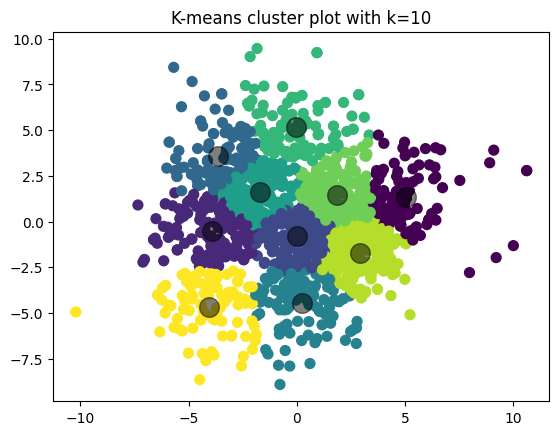

In [ ]:
#Initialize the class object
kmeans = KMeans(n_clusters= 10).fit(college_data)
y_kmeans = kmeans.predict(college_data)

plt.scatter(college_data[:, 0], college_data[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.title("K-means cluster plot with k=10")
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [ ]:
college_vorp_updated.columns

Index(['YEAR', 'Player', 'College', 'Season', 'School', 'Conf', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS', 'PER', 'TS%', 'eFG%', '3PAr', 'FTr', 'PProd', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/40', 'OBPM', 'DBPM', 'BPM', 'VORP', 'NBA ID', 'Rk', 'Pk', 'Tm', 'Yrs', 'MP.1', 'PTS.1', 'TRB.1', 'AST.1', 'WS/48', 'position', 'salary', 'Num_szns', 'Seasonal_VORP'], dtype='object')

In [ ]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, mean_squared_error, mean_absolute_error

#dataset
pca_df=pd.DataFrame(data_pca3, columns=['PC-1','PC-2','PC-3'])
X=pca_df
y=college_vorp_updated.Seasonal_VORP
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
LR=linear_model.LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
LR.coef_

array([ 0.00872782,  0.00559601, -0.02407037])

In [ ]:
#Average performance of k=5 folds linear regression
cv_results = cross_validate(LR, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
np.abs(np.mean(cv_results['test_score']))

0.6835652255525364

In [ ]:
predicted_vorp=LR.predict(X_test)
MAE = mean_absolute_error(y_test, predicted_vorp)
MAE

0.7257994034357034

In [ ]:
#seasonal vorps
y_train

1221    0.030769
913    -0.066667
1264   -0.315385
784     0.275000
149     1.328571
          ...   
986    -0.075000
133     0.800000
361     0.020000
1364    1.472222
451     1.627273
Name: Seasonal_VORP, Length: 1205, dtype: float64

In [ ]:
joined_df.Seasonal_VORP.describe()

count    226.000000
mean       2.041049
std        1.272628
min       -0.258333
25%        1.185417
50%        1.770000
75%        2.515385
max        5.414286
Name: Seasonal_VORP, dtype: float64

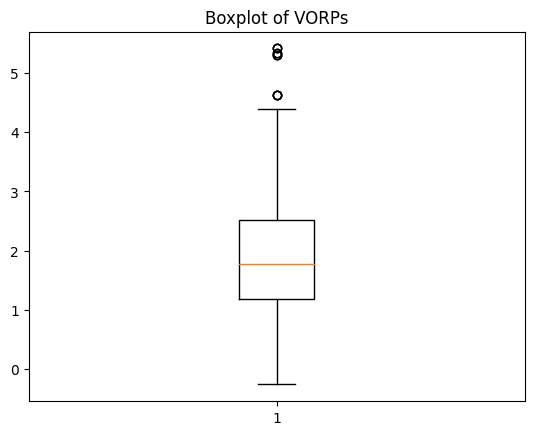

In [ ]:
#check boxplot threshold
plt.boxplot(joined_df.Seasonal_VORP)
plt.title('Boxplot of VORPs')
plt.show()

In [ ]:
# Number of all-stars in our dataset: 189
# Average VORP of all-stars in our dataset 28.844444444444445
pca_df=pd.DataFrame(data_pca3, columns=['PC-1','PC-2','PC-3'])
college_vorp_updated['Caliber']=np.where(college_vorp_updated.Seasonal_VORP > 1.72, 1, 0)
#college_vorp_updated['Caliber'].unique()
X=pca_df
y=college_vorp_updated.Caliber
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [ ]:
#merged2000_2018.to_csv('drive/MyDrive/PS2_FinalProject/merged2000_2018_nbaplayers.csv')

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
#set thresholds for y_train
clf.fit(X_train, y_train)
predicted_vorp=clf.predict(X_test)
rmse = mean_squared_error(y_test, predicted_vorp, squared = False)
rmse

0.33553357724220934